In [ ]:

import pandas as pd
import numpy as np
%matplotlib inline

import numpy as np
import pandas as pd
# Data pre-processing
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

In [ ]:
#some configs
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 14


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project/bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
cat_col = df.select_dtypes(exclude='number')
num_col = df.select_dtypes(include = 'number')

for i in cat_col.columns:
    print(cat_col[i].value_counts(normalize = True))
    print('------------------------')

job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: proportion, dtype: float64
------------------------
marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64
------------------------
education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64
------------------------
default
no     0.981973
yes    0.018027
Name: proportion, dtype: float64
------------------------
housing
yes    0.555838
no     0.444162
Name: proportion, dtype: float64
------------------------
loan
no     0.839774
yes    0.160226
Name: proportion, dtype: float64
------------------------
contact
cellular     0.647741
unknown      0.28798

job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: proportion, dtype: float64
------------------------


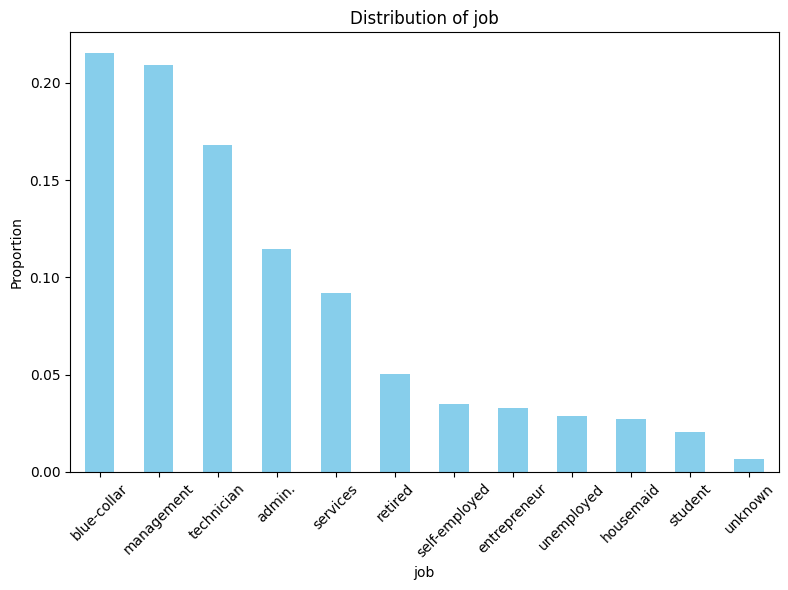

marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64
------------------------


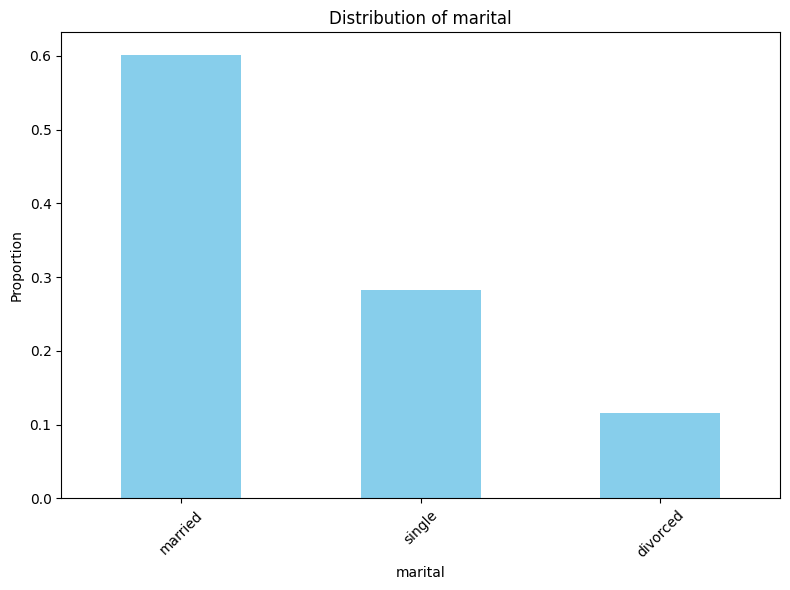

education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64
------------------------


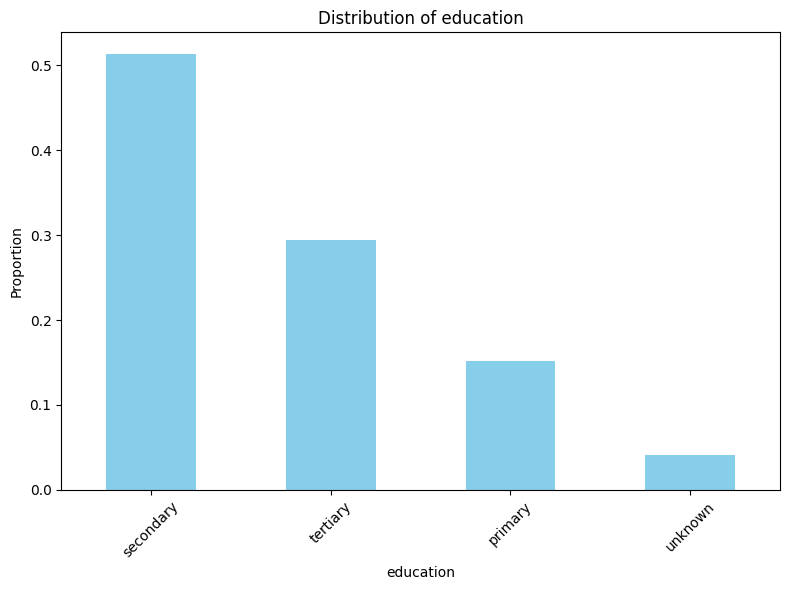

default
no     0.981973
yes    0.018027
Name: proportion, dtype: float64
------------------------


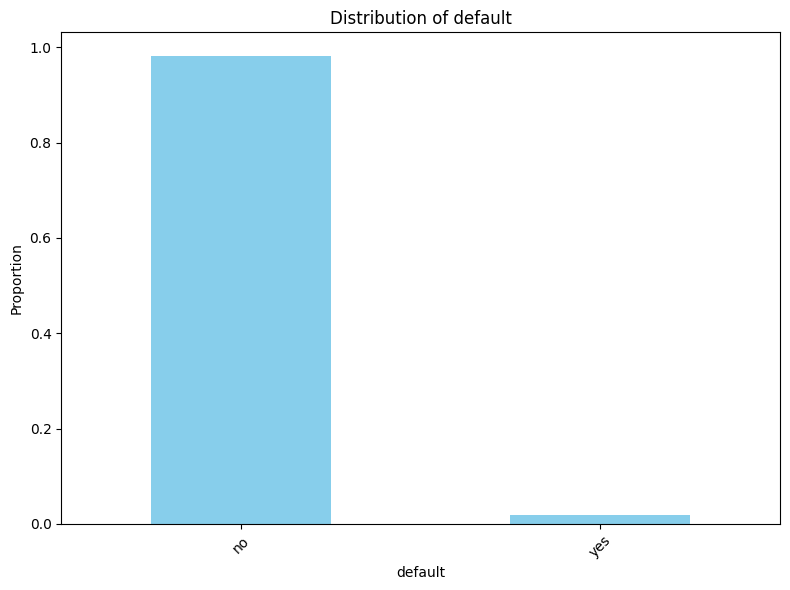

housing
yes    0.555838
no     0.444162
Name: proportion, dtype: float64
------------------------


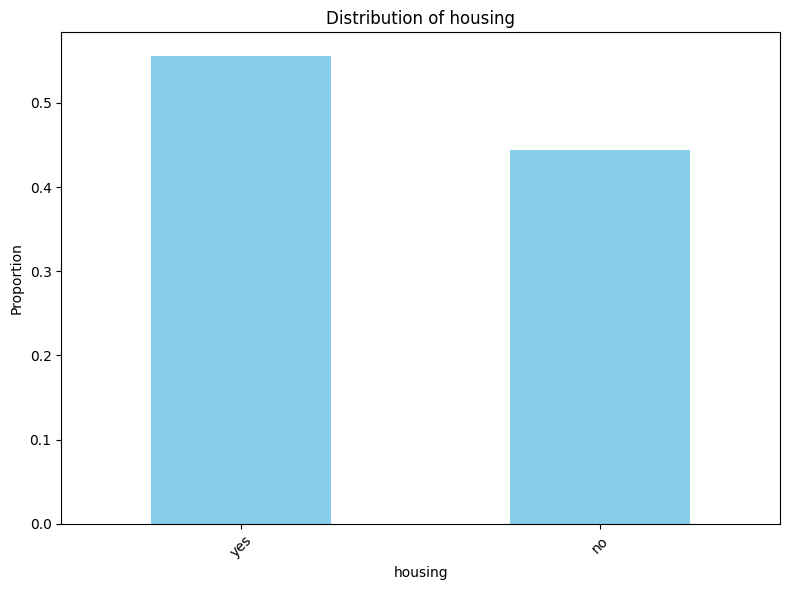

loan
no     0.839774
yes    0.160226
Name: proportion, dtype: float64
------------------------


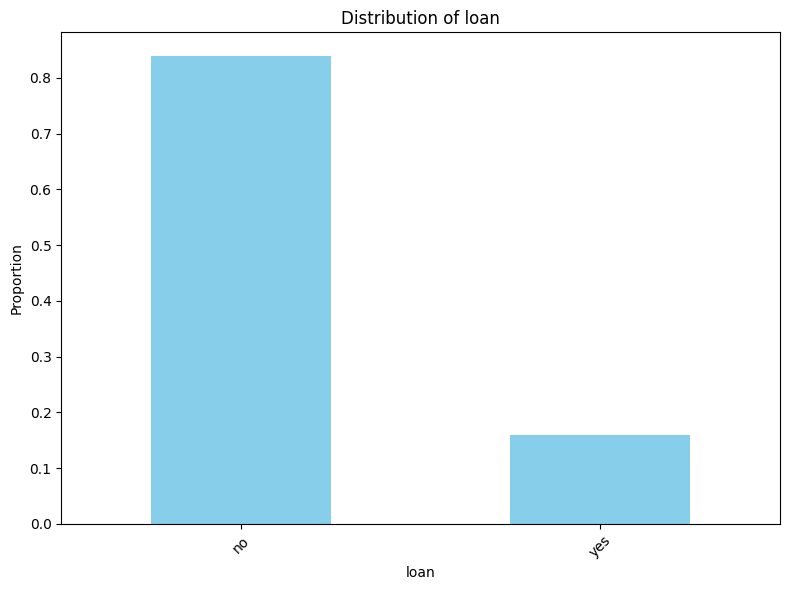

contact
cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: proportion, dtype: float64
------------------------


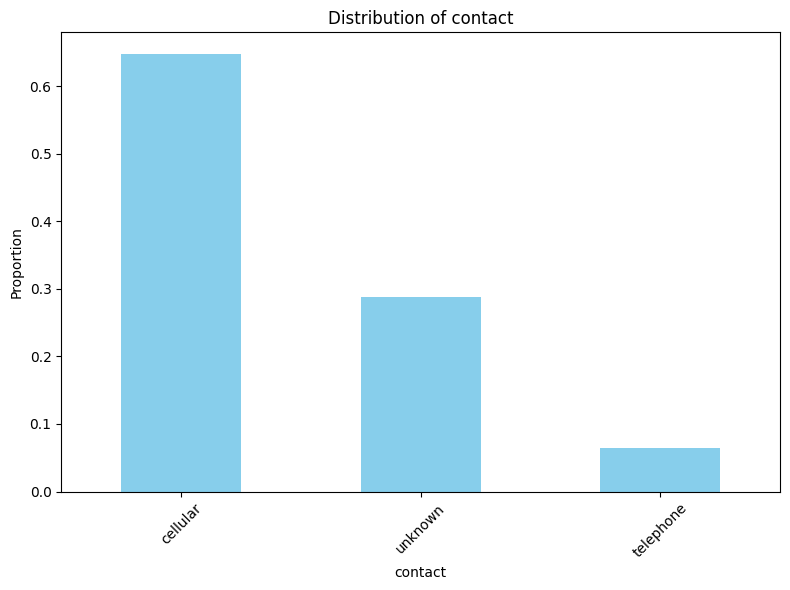

month
may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: proportion, dtype: float64
------------------------


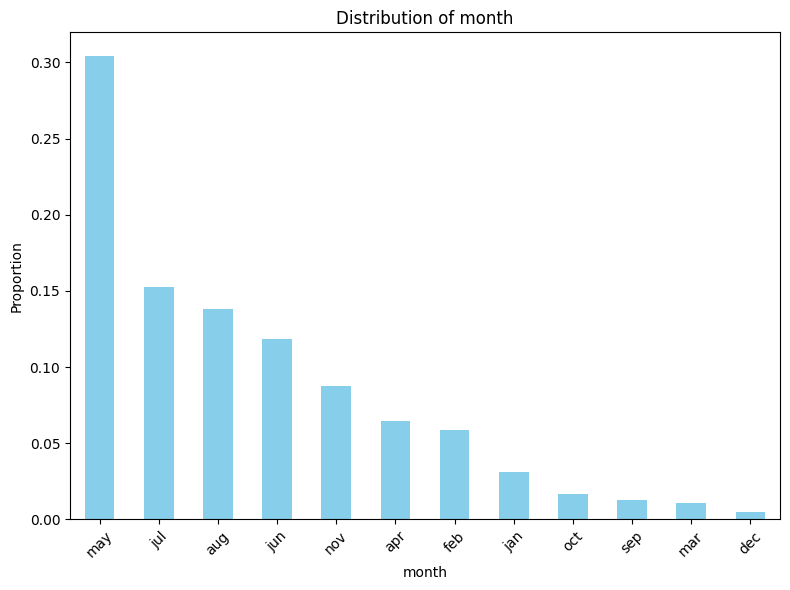

poutcome
unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: proportion, dtype: float64
------------------------


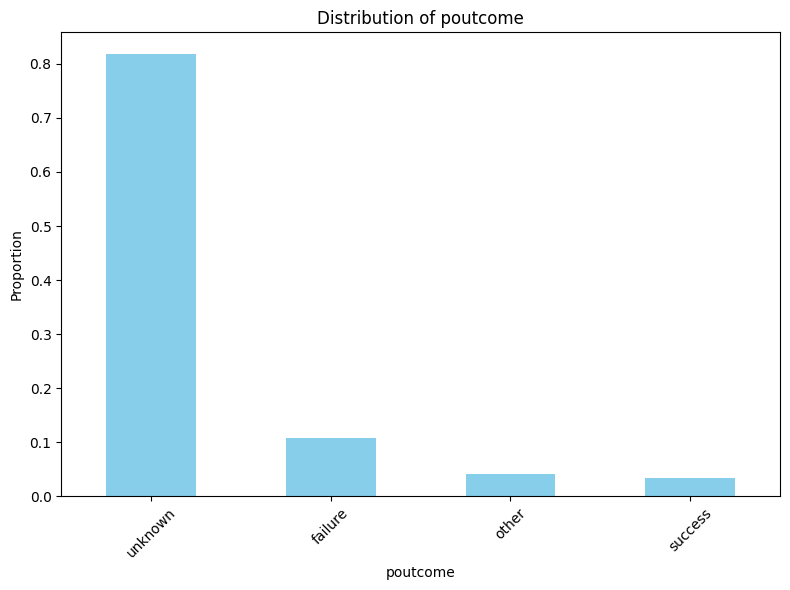

Target
no     0.883015
yes    0.116985
Name: proportion, dtype: float64
------------------------


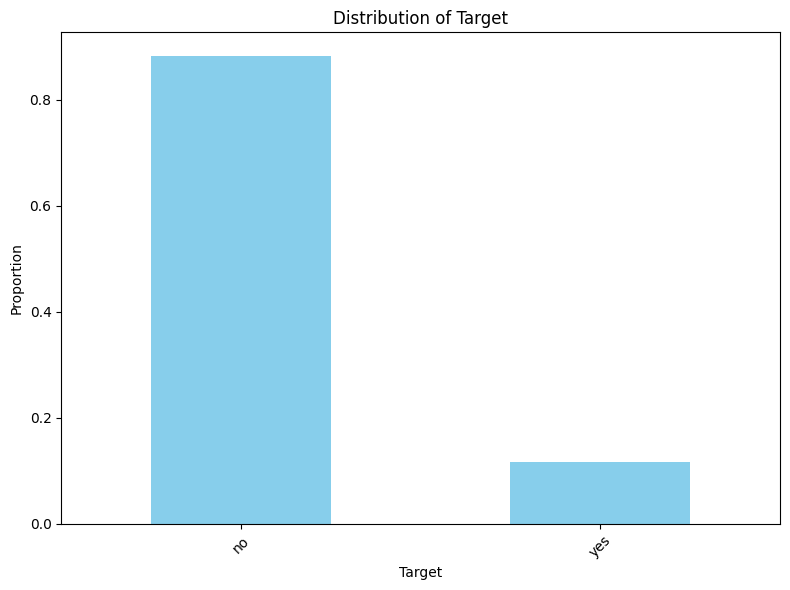

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả định rằng df đã được tải từ tập dữ liệu
# Ví dụ giả định cho bộ dữ liệu df (bởi vì dữ liệu thực tế chưa được cung cấp)
df =df.copy()

df = pd.DataFrame(df)

# Lựa chọn các cột phân loại và cột số
cat_col = df.select_dtypes(exclude='number')
num_col = df.select_dtypes(include='number')

# Lặp qua các cột phân loại và in ra tỷ lệ phân phối kèm theo biểu đồ cột
for i in cat_col.columns:
    # In ra tỷ lệ phân phối của các giá trị trong cột
    print(cat_col[i].value_counts(normalize=True))
    print('------------------------')

    # Vẽ biểu đồ cột
    plt.figure(figsize=(8, 6))
    cat_col[i].value_counts(normalize=True).plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {i}')
    plt.ylabel('Proportion')
    plt.xlabel(f'{i}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Data Exploratory

In [ ]:
## Poutcome, previous, pdays
df = df.drop(['poutcome','previous','pdays'], axis = 1)

In [ ]:
## Handling unknown values
## Job, education, contact
df['job'] = df['job'].replace(['unknown'], df['job'].mode()[0])
df['education'] = df['education'].replace(['unknown'], df['education'].mode()[0])
df['contact'] = df['contact'].replace(['unknown'], df['contact'].mode()[0])
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Target
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,no


In [ ]:
df['month'].value_counts()

,count
month,
may,13766
jul,6895
aug,6247
jun,5341
nov,3970
apr,2932
feb,2649
jan,1403
oct,738


In [ ]:
df['month'] = df['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'],[5,6,7,8,10,11,12,1,2,3,4,9])

<ipython-input-9-b3ae562a9305>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['month'] = df['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',


In [ ]:
df['Target'] = np.where(df['Target'] == 'yes',1,0)

VIF

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Giả sử df là bộ dữ liệu ban đầu của bạn
# Chỉ chọn các cột là biến độc lập (numeric)
X = df.select_dtypes(include=['float64', 'int64'])

# Hàm tính toán VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Tính VIF
vif_df = calculate_vif(X)

# Hiển thị kết quả
print(vif_df)


    feature       VIF
0       age  7.539907
1   balance  1.223457
2       day  4.273217
3     month  6.499736
4  duration  2.269734
5  campaign  1.839209
6    Target  1.347605


<Axes: >

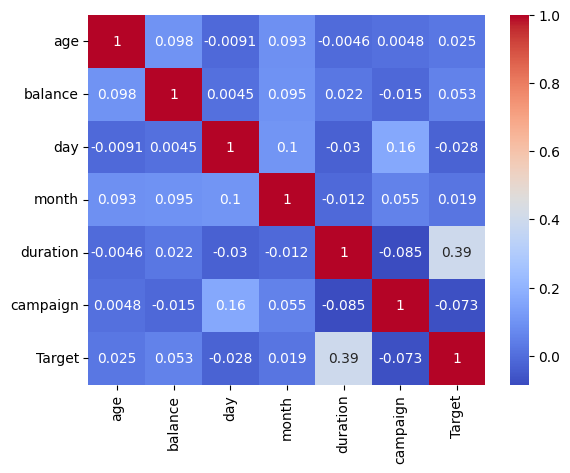

In [ ]:
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

# Calculate the correlation matrix, selecting only numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Xử lý đa cộng tuyến với Age và Month

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Chọn các cột cần chuẩn hóa (age và month)
scaler = StandardScaler()
df[['age', 'month']] = scaler.fit_transform(df[['age', 'month']])

# Hàm tính VIF
def calculate_vif(dataframe):
    # Select only numeric features for VIF calculation
    numeric_df = dataframe.select_dtypes(include=['float64', 'int64'])
    vif_data = pd.DataFrame()
    vif_data['feature'] = numeric_df.columns
    vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    return vif_data

# Tính VIF sau khi chuẩn hóa
vif_after_scaling = calculate_vif(df)
print("VIF after scaling:\n", vif_after_scaling)

VIF after scaling:
     feature       VIF
0       age  1.017836
1   balance  1.186548
2       day  2.350489
3     month  1.019254
4  duration  2.008597
5  campaign  1.723663
6    Target  1.348515


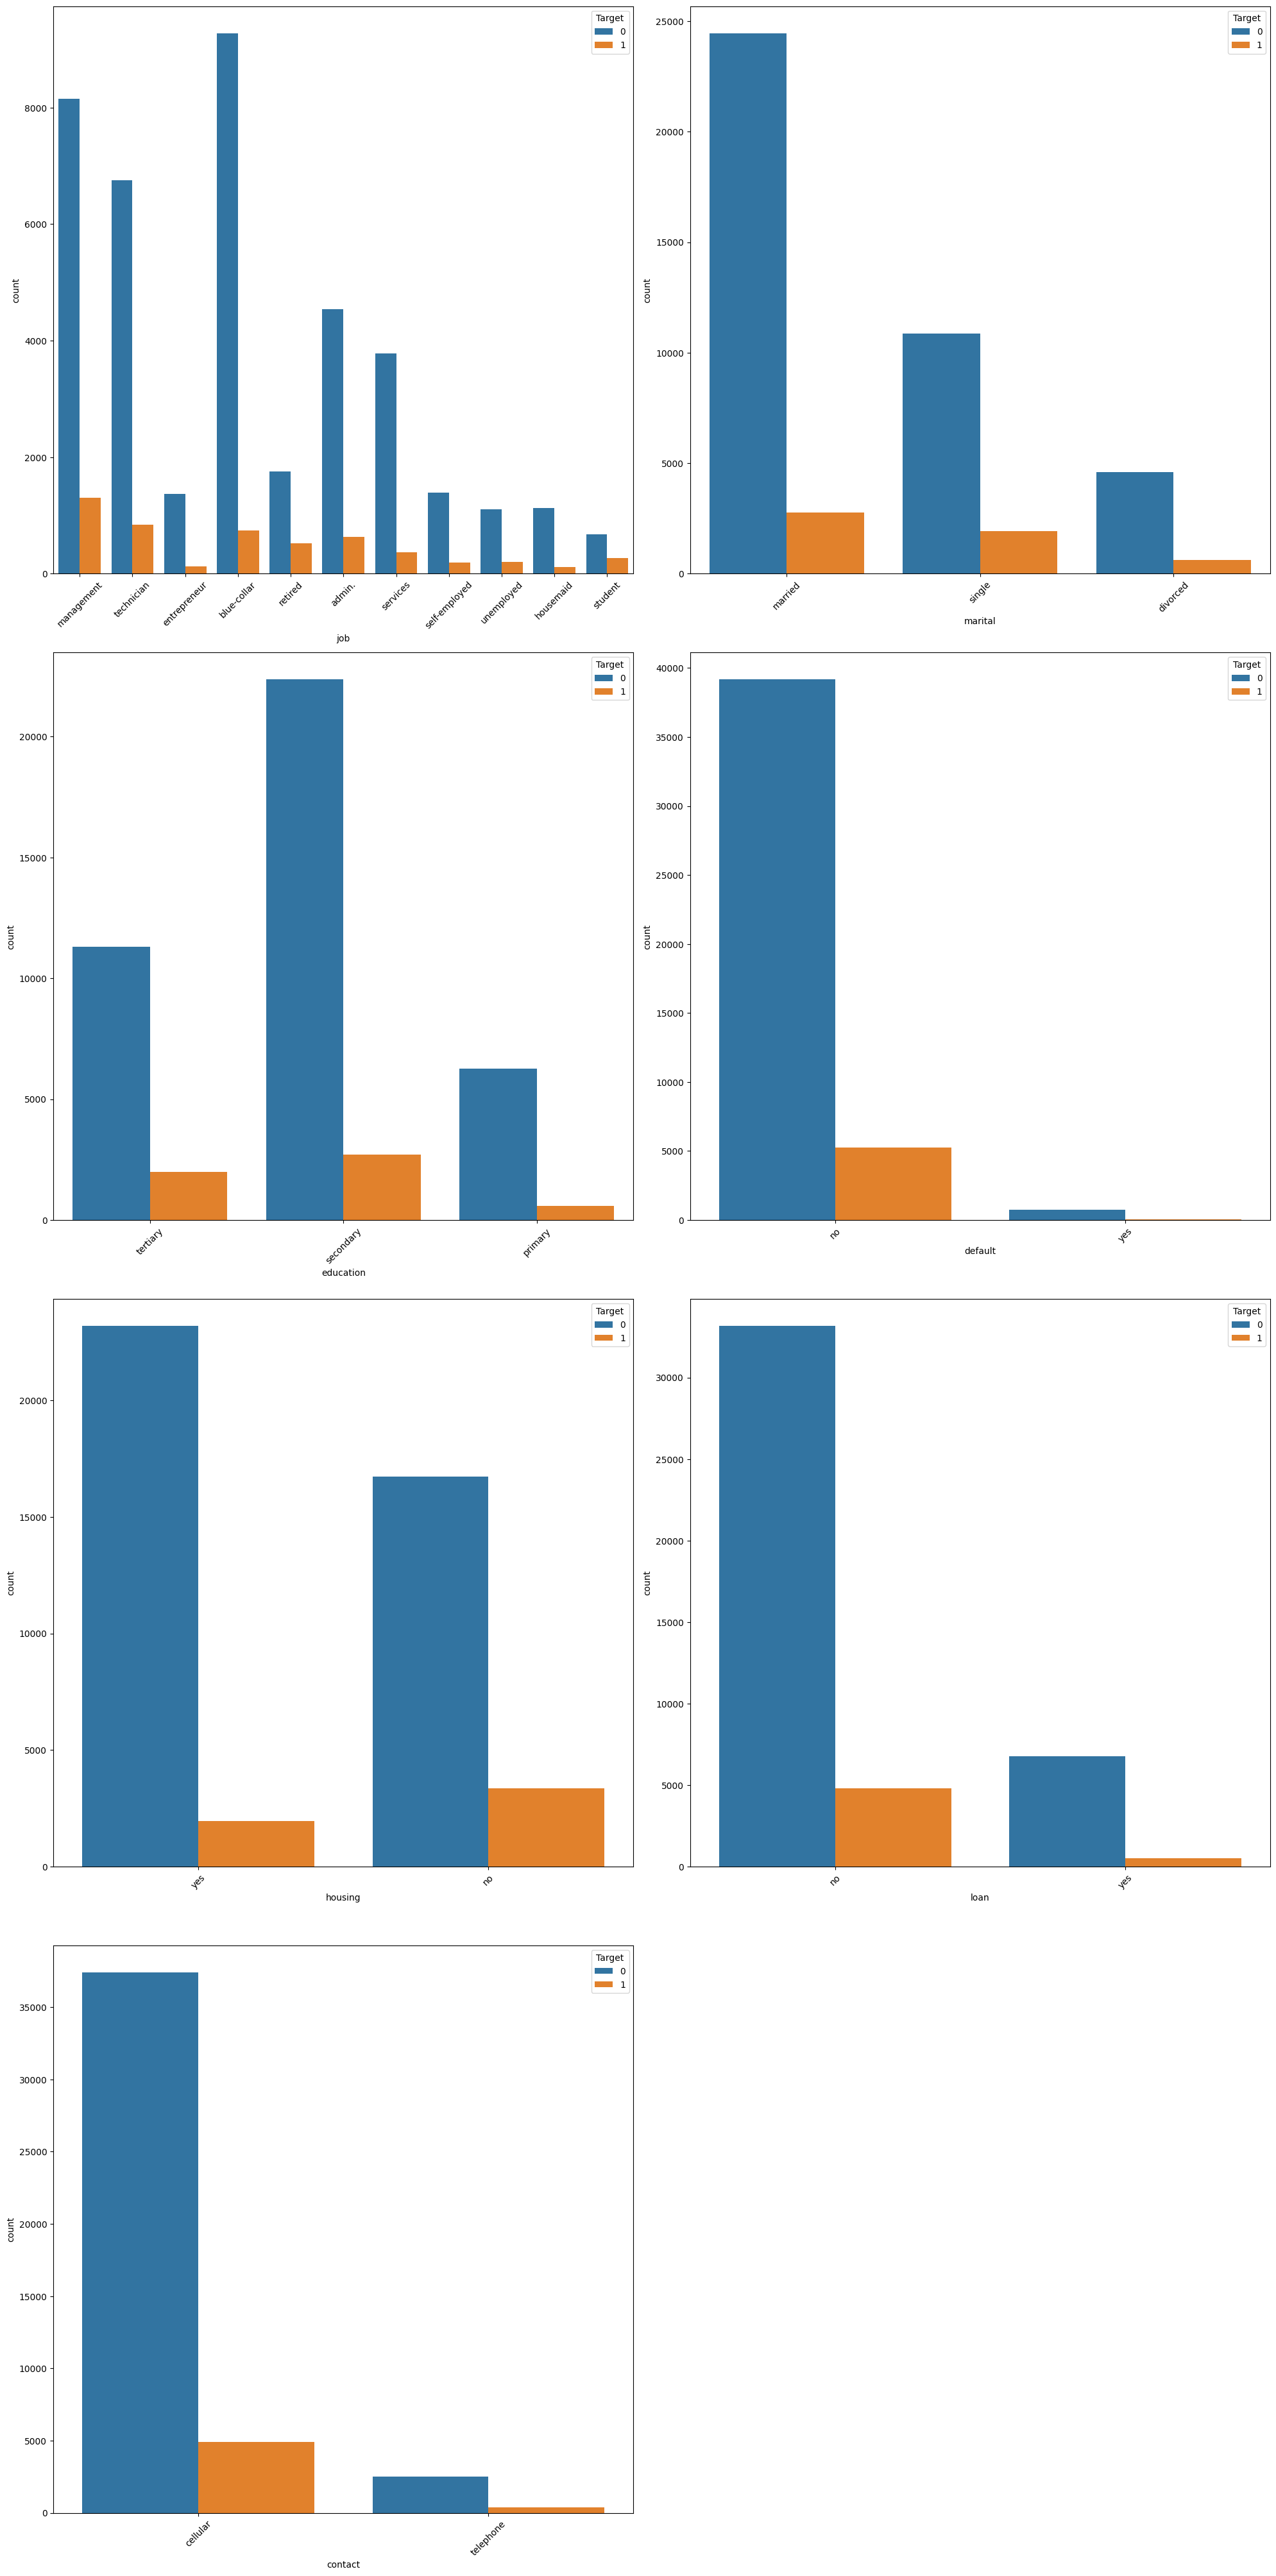

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc các cột loại số và loại phân loại (categorical)
cat_col = df.select_dtypes(exclude='number')
num_col = df.select_dtypes(include='number')
colors = ["#69b3a2", "#4374B3"]

# Bỏ qua các cảnh báo không cần thiết
warnings.filterwarnings('ignore')

# Thiết lập kích thước của hình vẽ
plt.figure(figsize=(20, 120))

# Vẽ biểu đồ countplot cho các cột phân loại
for i, col in enumerate(cat_col.columns):
    plt.subplot(12, 2, i + 1)
    sns.countplot(x=col, data=df, hue='Target')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Dữ liệu mất cân bằng cột Target. Số 'No' nhiều hơn số 'có' có thể ảnh hưởng tới mô hình dữ đoán

Numeric variables

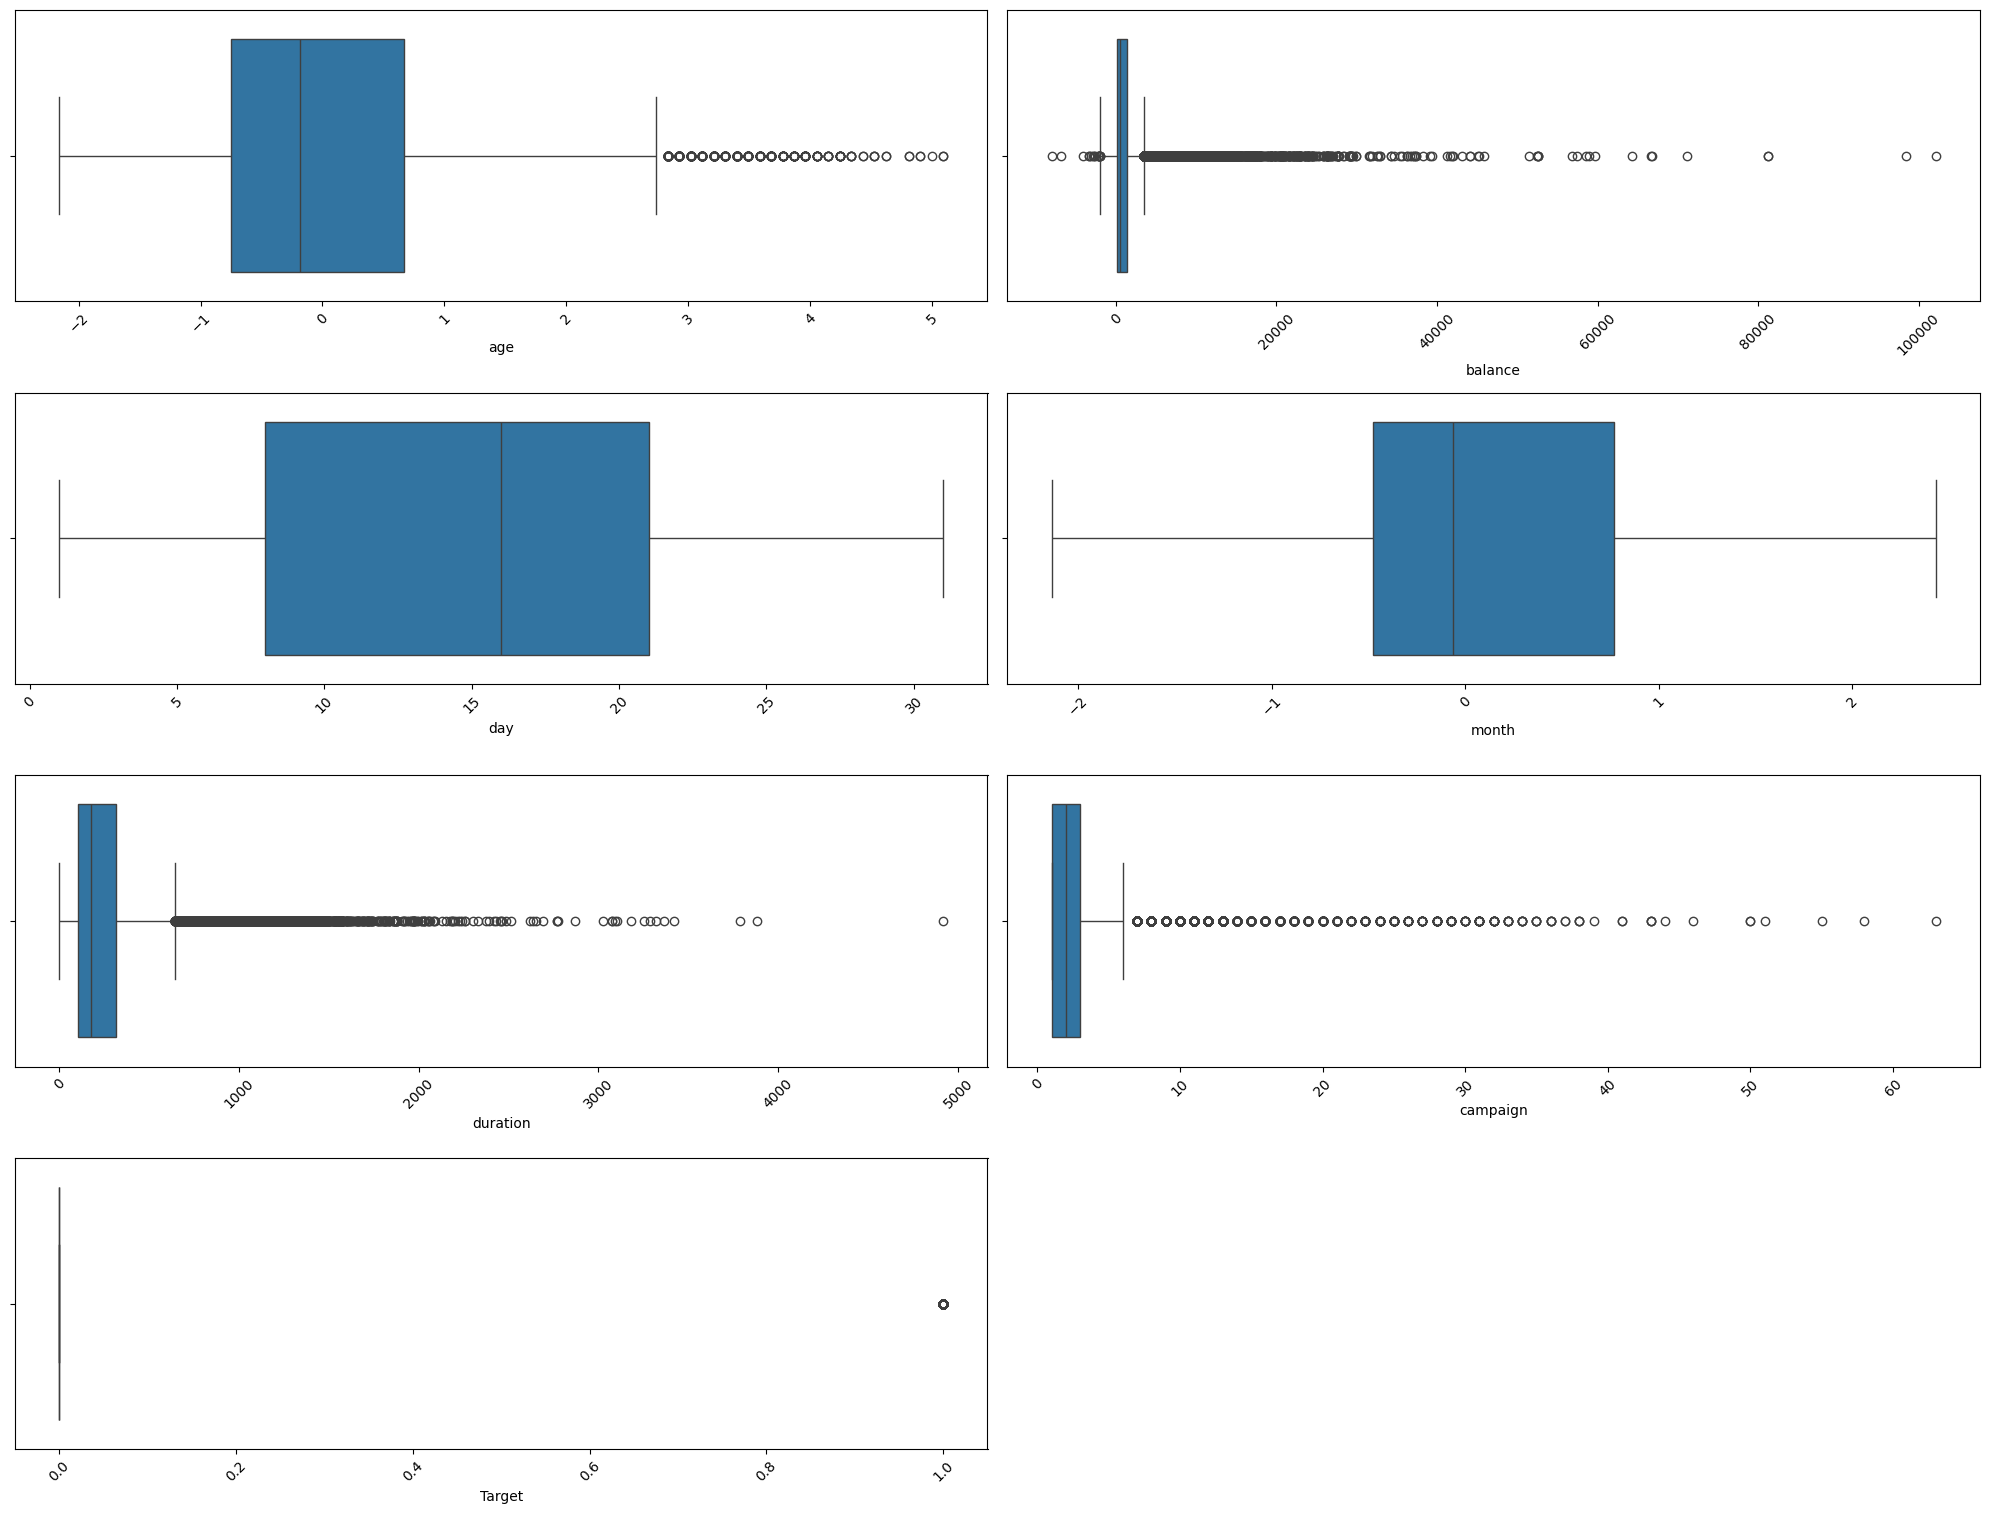

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Bỏ qua các cảnh báo không cần thiết
warnings.filterwarnings('ignore')

# Thiết lập kích thước hình vẽ
plt.figure(figsize=(20, 30), dpi=100)

# Lọc các cột dạng số
num_col = df.select_dtypes(include='number')

# Vẽ biểu đồ boxplot cho các cột dạng số
for i, col in enumerate(num_col.columns):
    plt.subplot(8, 2, i + 1)
    sns.boxplot(x=col, data=df)
    plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
for col in num_col.columns:
    print(f'Median of {col} is :{df[col].median()}')

Median of age is :-0.18234061750847744
Median of balance is :448.0
Median of day is :16.0
Median of month is :-0.06007251677357781
Median of duration is :180.0
Median of campaign is :2.0
Median of Target is :0.0


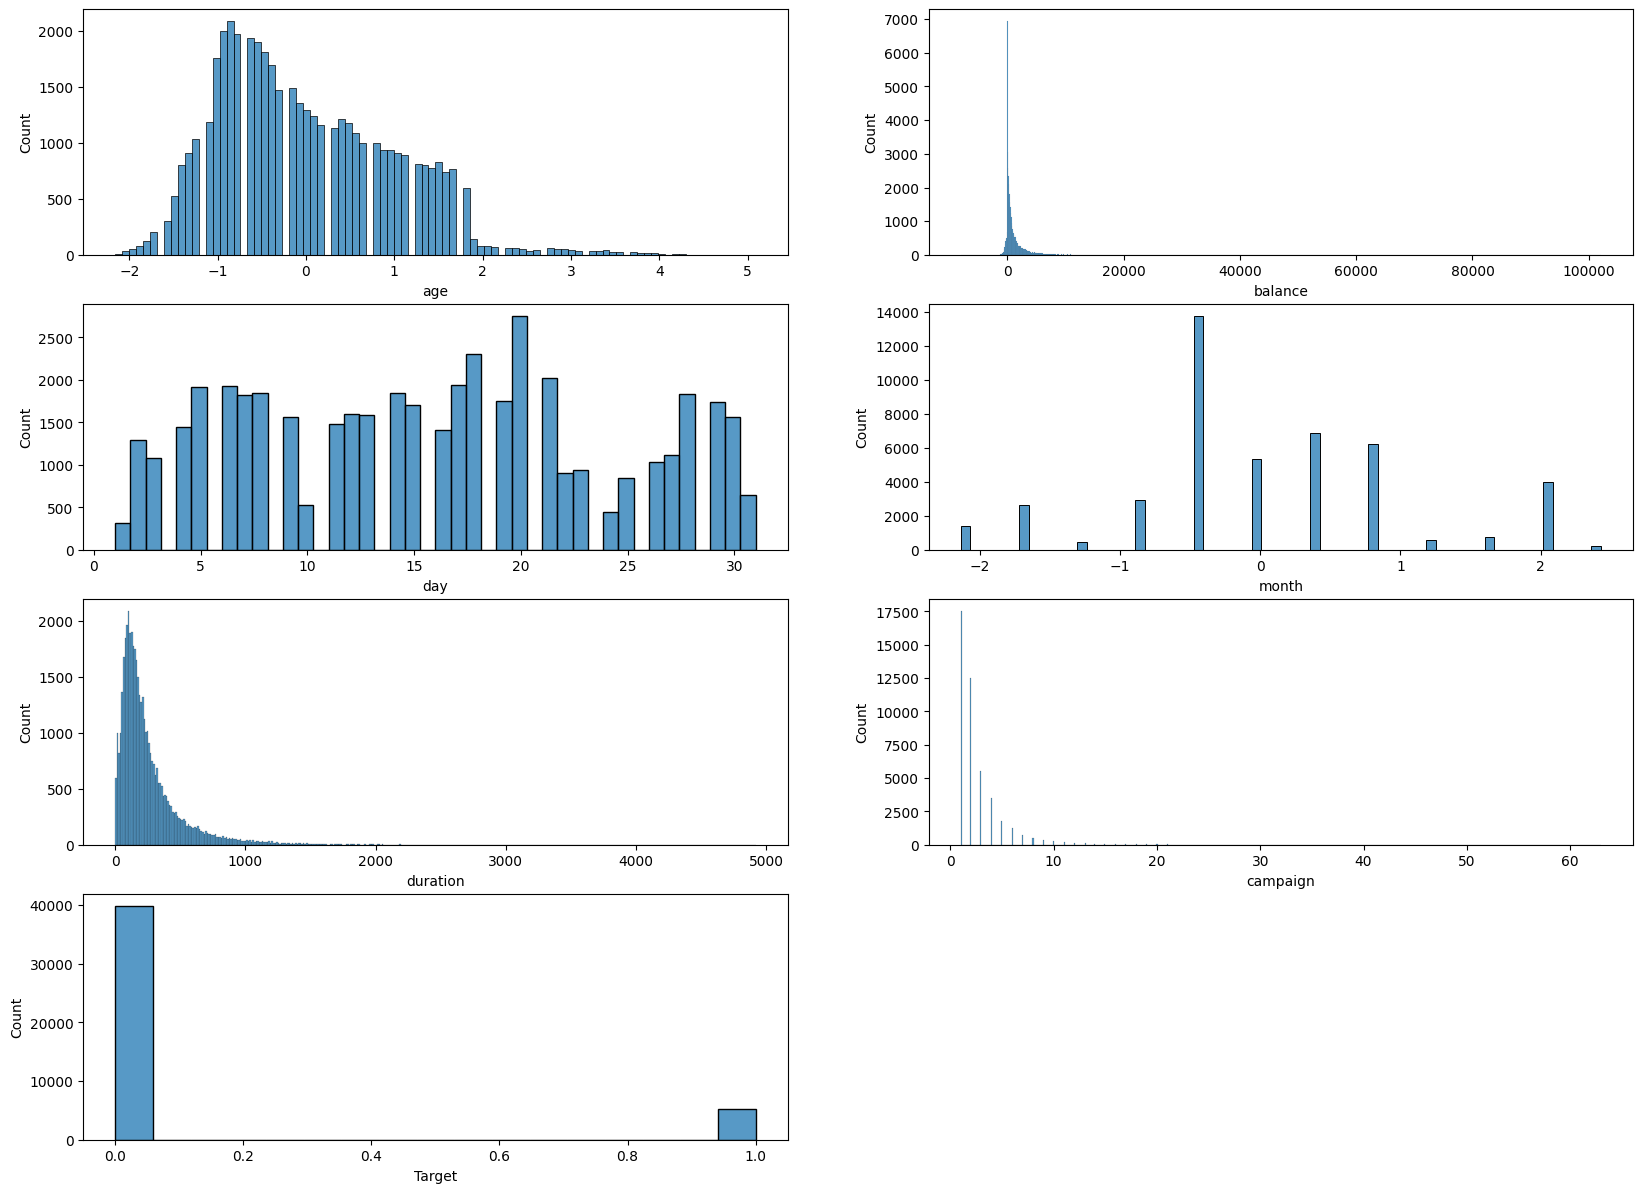

In [ ]:
plt.figure(figsize=(20,30),dpi=100)
for i in enumerate(num_col.columns):
    plt.subplot(8,2,i[0]+1)
    sns.histplot(x = i[1], data=df)

In [ ]:
def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

In [ ]:
determine_outlier_thresholds_iqr(df, 'balance', th1=0.25, th3=0.75)

(-1962.0, 3462.0)

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
for col in num_col:
    print(col, check_outlier(df, col))

age True
balance True
day False
month False
duration True
campaign True
Target True


<Axes: ylabel='campaign'>

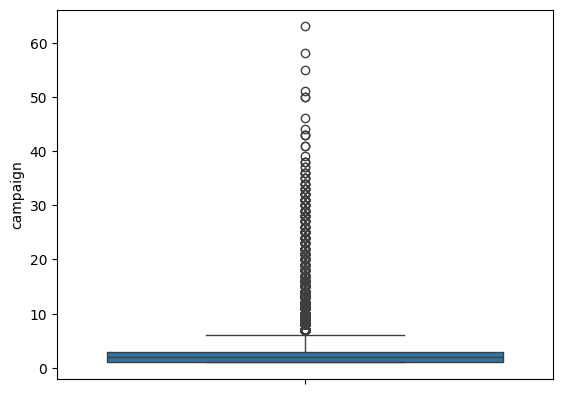

In [ ]:
sns.boxplot(df['campaign'])

In [ ]:
df[df['campaign']>10]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Target
2251,40,technician,married,secondary,no,2576,yes,yes,cellular,12,5,10,11,0
2305,25,admin.,single,secondary,no,1,yes,yes,cellular,12,5,24,12,0
2626,31,technician,married,secondary,no,106,yes,no,cellular,13,5,101,13,0
2664,40,blue-collar,married,secondary,no,598,yes,no,cellular,13,5,69,11,0
2665,42,blue-collar,divorced,secondary,no,-135,yes,no,cellular,13,5,15,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44100,70,retired,divorced,secondary,no,4572,no,no,cellular,8,7,173,11,0
44231,32,entrepreneur,married,tertiary,no,762,no,no,cellular,19,7,187,11,1
44583,24,student,single,secondary,no,431,no,no,cellular,19,8,418,11,1
44594,34,technician,single,tertiary,no,2481,no,no,cellular,23,8,220,16,0


Delete outliers

In [ ]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [ ]:
for col in (['balance','duration','campaign']):
    df = remove_outlier(df, col)

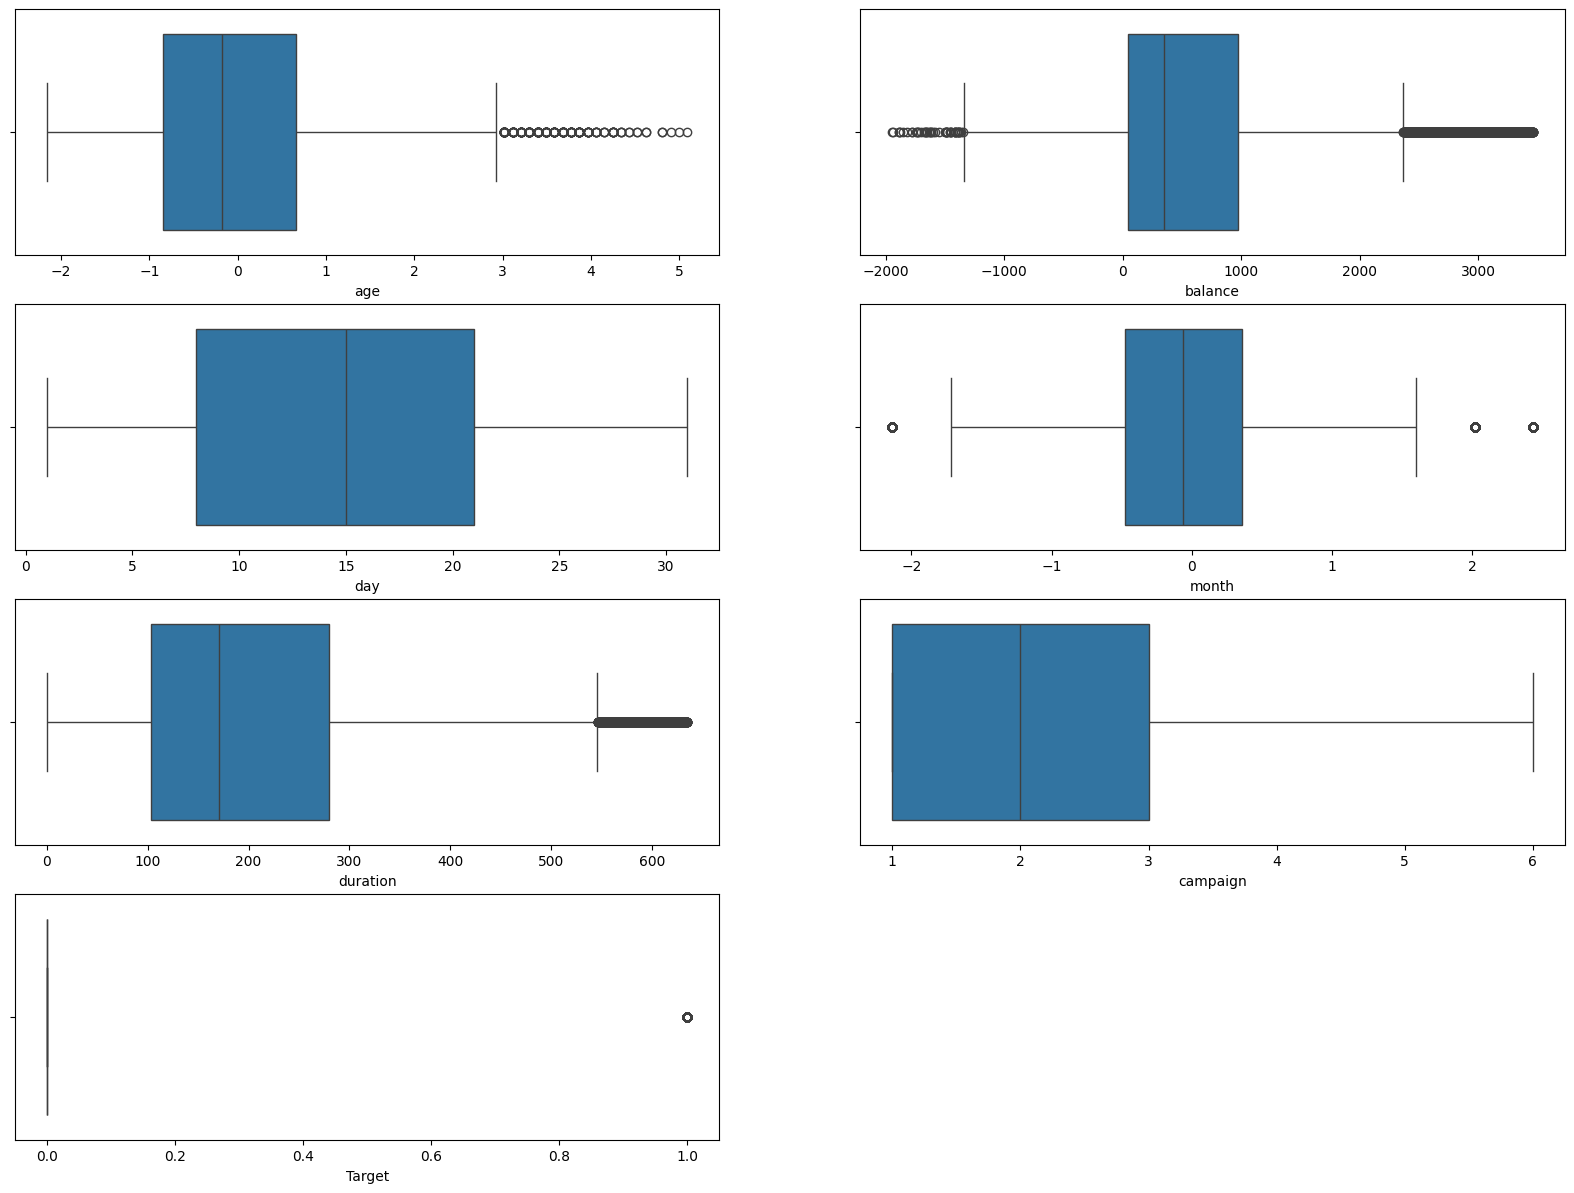

In [ ]:
plt.figure(figsize=(20,30),dpi=100)
for i in enumerate(num_col.columns):
    plt.subplot(8,2,i[0]+1)
    sns.boxplot(x = i[1], data=df)

<Figure size 2000x12000 with 0 Axes>

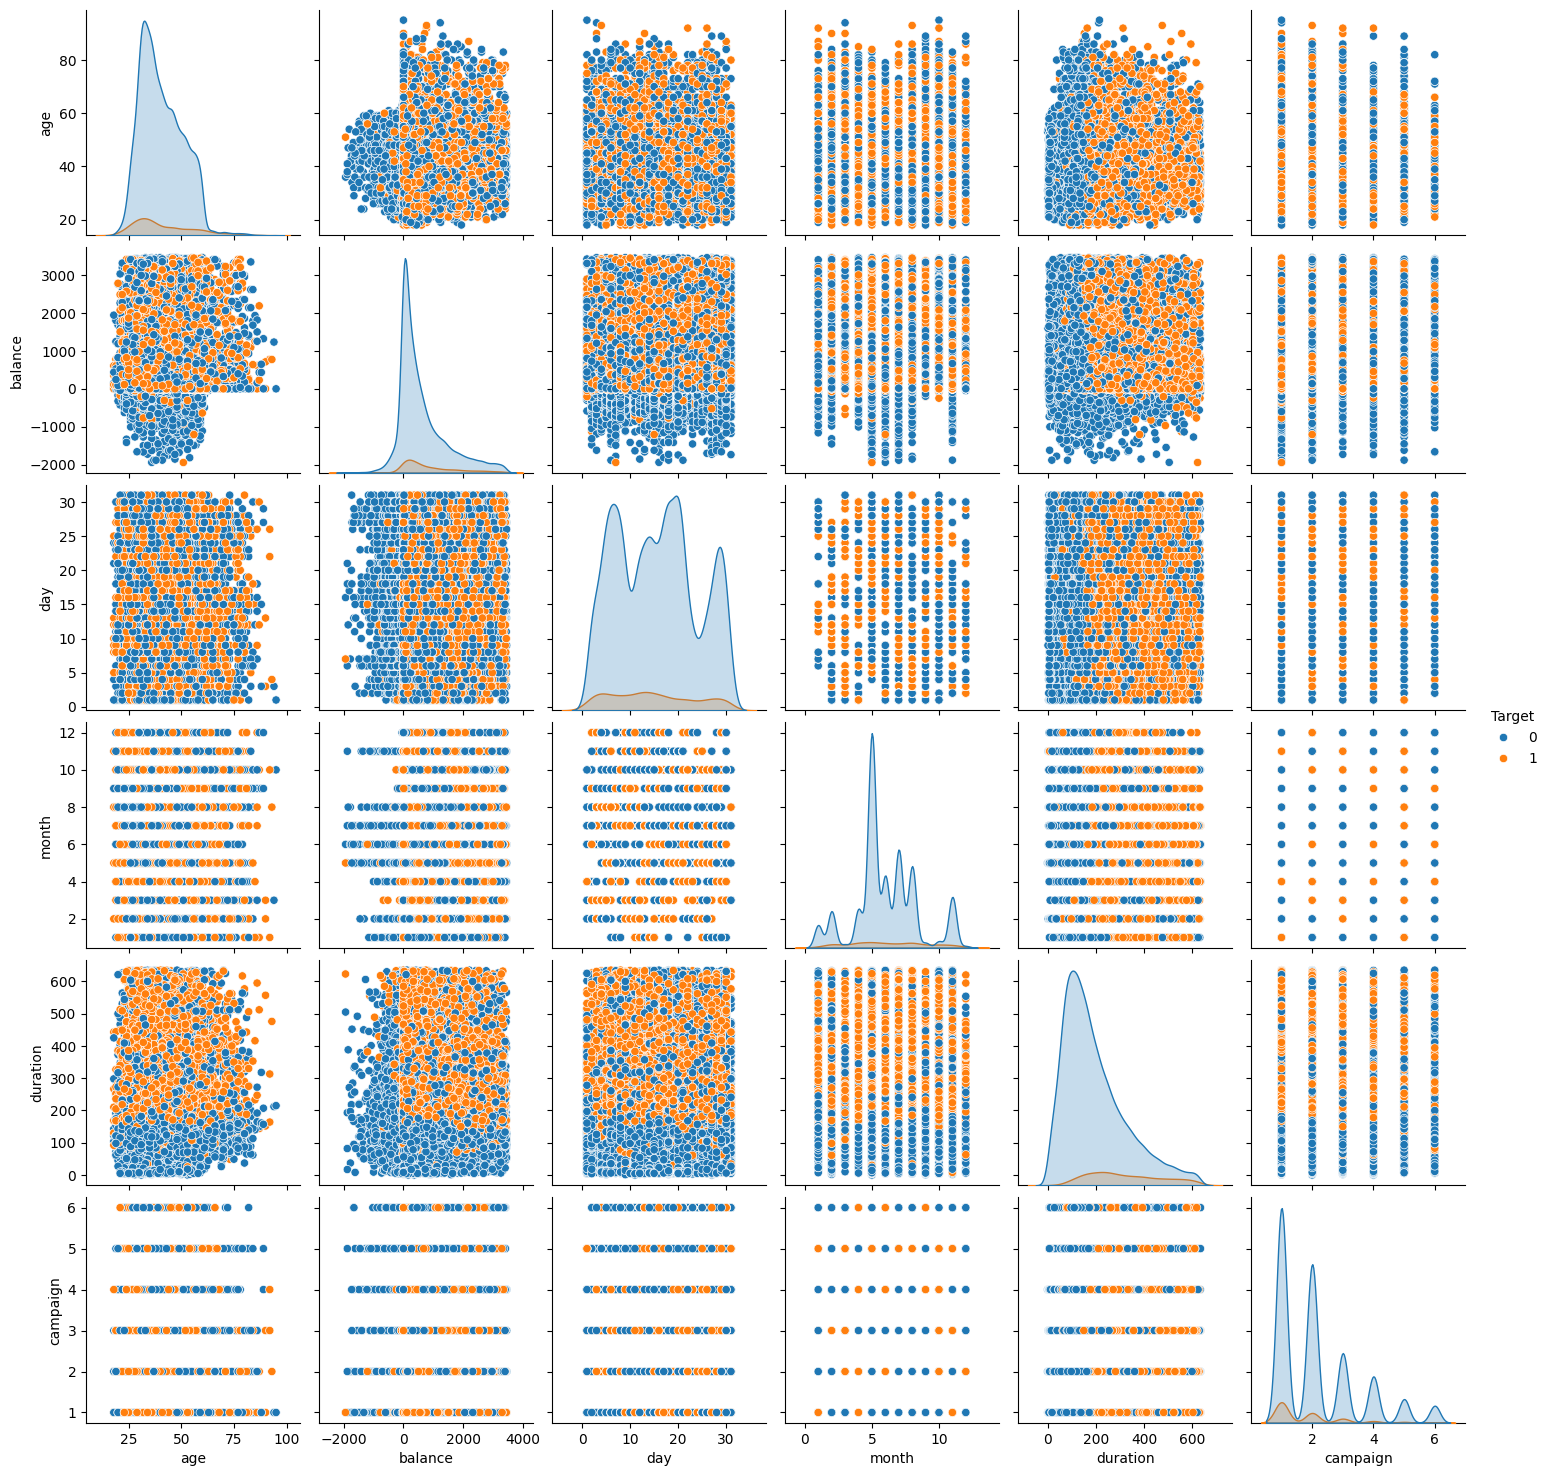

<Figure size 2000x12000 with 0 Axes>

In [ ]:
sns.pairplot(data=df, hue = 'Target')
plt.figure(figsize=(20,120))

In [ ]:
## Data Transfromation
df['education'] = LabelEncoder().fit_transform(df['education'])
DF = pd.get_dummies(data= df, columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact','Target'], drop_first = True)

In [ ]:
DF.corr()

,age,education,balance,day,month,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,...,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,Target_1
age,1.000000,-0.164888,0.097783,-0.009120,0.092903,-0.004648,0.004760,-0.033926,0.021792,0.086650,...,-0.197302,-0.068632,0.000412,0.286257,-0.427817,-0.017879,-0.185513,-0.015655,0.170349,0.025155
education,-0.164888,1.000000,0.067184,0.025931,0.071938,0.002635,0.003703,-0.412379,0.055307,-0.131003,...,0.010750,0.065866,-0.031195,-0.144830,0.159197,-0.011539,-0.075157,-0.025282,-0.070190,0.068633
balance,0.097783,0.067184,1.000000,0.004503,0.094605,0.021560,-0.014578,-0.046182,0.009642,0.001661,...,0.001233,-0.016183,0.009023,0.025708,-0.012537,-0.066745,-0.068768,-0.084350,0.037999,0.052838
day,-0.009120,0.025931,0.004503,1.000000,0.101989,-0.030206,0.162490,-0.024804,-0.002312,0.003955,...,-0.015894,0.032517,-0.006382,0.007102,-0.007412,0.009424,-0.027982,0.011370,0.023652,-0.028348
month,0.092903,0.071938,0.094605,0.101989,1.000000,-0.011866,0.054868,-0.083915,0.025128,0.031249,...,-0.018733,0.037859,-0.040271,0.062925,-0.068586,0.014989,-0.173887,0.021638,0.037628,0.018717
duration,-0.004648,0.002635,0.021560,-0.030206,-0.011866,1.000000,-0.084570,0.008312,-0.001327,-0.008046,...,-0.006504,-0.009176,0.020322,-0.022683,0.020328,-0.010021,0.005075,-0.012412,-0.023201,0.394521
campaign,0.004760,0.003703,-0.014578,0.162490,0.054868,-0.084570,1.000000,0.011591,0.002128,0.003097,...,-0.021813,0.020739,-0.018448,0.031371,-0.023120,0.016822,-0.023599,0.009980,0.053895,-0.073172
job_blue-collar,-0.033926,-0.412379,-0.046182,-0.024804,-0.083915,0.008312,0.011591,1.000000,-0.098404,-0.089608,...,-0.077669,-0.239808,-0.091922,0.123983,-0.088985,0.008955,0.161249,0.011982,0.002812,-0.071279
job_entrepreneur,0.021792,0.055307,0.009642,-0.002312,0.025128,-0.001327,0.002128,-0.098404,1.000000,-0.030969,...,-0.026843,-0.082878,-0.031768,0.044319,-0.050297,0.026281,0.010600,0.039808,-0.004338,-0.019662
job_housemaid,0.086650,-0.131003,0.001661,0.003955,0.031249,-0.008046,0.003097,-0.089608,-0.030969,1.000000,...,-0.024443,-0.075470,-0.028929,0.045816,-0.062177,-0.000359,-0.079380,-0.017234,0.039371,-0.015195


In [ ]:
DF.shape

(34967, 24)

In [ ]:
DF['Target_1'].value_counts()

,count
Target_1,
False,39922
True,5289


Building models






Decision Tree

In [ ]:
X = DF.drop('Target_1', axis = 1)
y = DF['Target_1']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)
print(f'Dimension of X test is : {X_test.shape}')
print(f'Dimension of X train is : {X_train.shape}')

Dimension of X test is : (10491, 23)
Dimension of X train is : (24476, 23)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(X_train, y_train)

In [ ]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)
print(f'Accuracy score on test set is: {accuracy_score(y_test, y_test_pred)}')
print(f'Accuracy score on train set is: {accuracy_score(y_train, y_train_pred)}')

Accuracy score on test set is: 0.8933371461252502
Accuracy score on train set is: 1.0


[[9002  607]
 [ 512  370]]


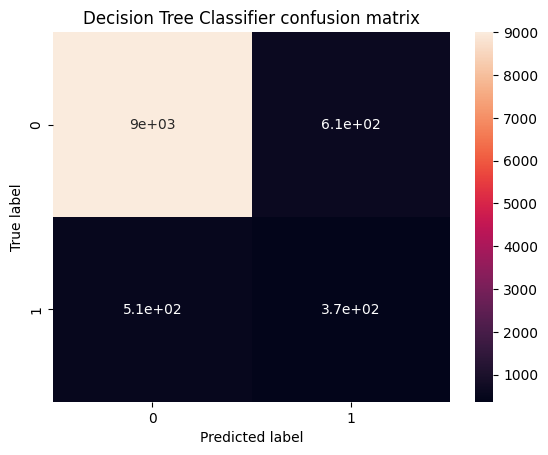

In [ ]:
cfm = confusion_matrix(y_test, y_test_pred)
print(cfm)
sns.heatmap(cfm, annot = True)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.95      0.94      0.94      9609
        True       0.38      0.42      0.40       882

    accuracy                           0.89     10491
   macro avg       0.66      0.68      0.67     10491
weighted avg       0.90      0.89      0.90     10491



In [ ]:
from sklearn import metrics
dt_auc = metrics.roc_auc_score(y_test, y_test_pred)
dt_auc

0.6781655944717361

Random forest


In [ ]:
## Fit the model
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 300, random_state = 100)
rf = rf.fit(X_train, y_train)

In [ ]:
## Predict on test and train sets.
rf_y_test_pred = rf.predict(X_test)
rf_y_train_pred = rf.predict(X_train)

print(f'The accuracy score of train and test are: {accuracy_score(y_train, rf_y_train_pred)} and {accuracy_score(y_test, rf_y_test_pred)} respectively')

The accuracy score of train and test are: 1.0 and 0.9202173291392622 respectively


[[9493  116]
 [ 721  161]]


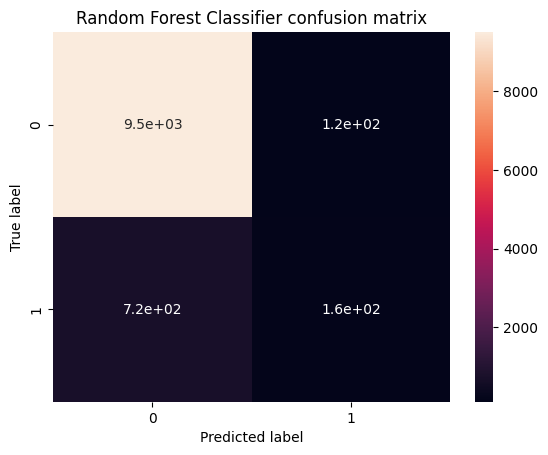

In [ ]:
## Confusion matrix
cfm = confusion_matrix(y_test, rf_y_test_pred)
print(cfm)
sns.heatmap(cfm, annot = True)
plt.title('Random Forest Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
## Classification report
print(classification_report(y_test, rf_y_test_pred))

              precision    recall  f1-score   support

       False       0.93      0.99      0.96      9609
        True       0.58      0.18      0.28       882

    accuracy                           0.92     10491
   macro avg       0.76      0.59      0.62     10491
weighted avg       0.90      0.92      0.90     10491



In [ ]:
## AUC score
rf_auc = metrics.roc_auc_score(y_test, rf_y_test_pred)
rf_auc

0.5852338333605895

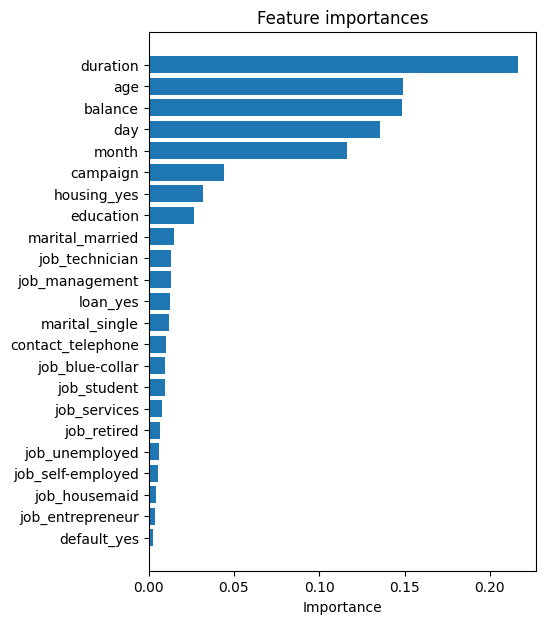

In [ ]:
## Feature importance
import pandas as pd
#feature_imp = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
features_list = X.columns.values
feature_imp = rf.feature_importances_
sorted_idx = np.argsort(feature_imp)


sorted_idx = np.argsort(feature_imp)
plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_imp[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

Knn

In [ ]:
## Building model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn = knn.fit(X_train, y_train)

In [ ]:
## Predict on test and train
knn_y_test_pred = knn.predict(X_test)
knn_y_train_pred = knn.predict(X_train)
print(f'The accuracy score of train and test are: {accuracy_score(y_train, knn_y_train_pred)} and {accuracy_score(y_test, knn_y_test_pred)} respectively')

The accuracy score of train and test are: 0.9157950645530315 and 0.9154513392431608 respectively


In [ ]:
## Classification report
print(classification_report(y_test, knn_y_test_pred))

              precision    recall  f1-score   support

       False       0.92      1.00      0.96      9609
        True       0.46      0.03      0.06       882

    accuracy                           0.92     10491
   macro avg       0.69      0.51      0.51     10491
weighted avg       0.88      0.92      0.88     10491



In [ ]:
## Auc score
knn_auc = metrics.roc_auc_score(y_test, knn_y_test_pred)
knn_auc

0.5136410168188412

Logistics

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 100)
lg = lg.fit(X_train, y_train)


In [ ]:
lg_y_test_pred = lg.predict(X_test)
lg_y_train_pred = lg.predict(X_train)
print(f'The accuracy score of train and test are: {accuracy_score(y_train, lg_y_train_pred)} and {accuracy_score(y_test, lg_y_test_pred)} respectively')

The accuracy score of train and test are: 0.9123631312305932 and 0.9152606996473167 respectively


In [ ]:
cfm = confusion_matrix(y_test, lg_y_test_pred)
cfm

array([[9557,   52],
       [ 837,   45]])

In [ ]:
print(classification_report(y_test, lg_y_test_pred))

              precision    recall  f1-score   support

       False       0.92      0.99      0.96      9609
        True       0.46      0.05      0.09       882

    accuracy                           0.92     10491
   macro avg       0.69      0.52      0.52     10491
weighted avg       0.88      0.92      0.88     10491



In [ ]:
lg_auc = metrics.roc_auc_score(y_test, lg_y_test_pred)
lg_auc

0.5228044074326578

In [ ]:

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# 2. Mô hình Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Đánh giá độ chính xác của mô hình Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy of Decision Tree: {accuracy_tree:.2f}')

Accuracy of Decision Tree: 0.89


In [ ]:
# 1. Mô hình SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Đánh giá độ chính xác của mô hình SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy of SVM: {accuracy_svm:.2f}')

Regression Model


In [ ]:
print(df.dtypes)

age            int64
job          float64
marital      float64
education     object
default      float64
balance        int64
housing      float64
loan         float64
contact      float64
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
Target        object
dtype: object


In [ ]:
# Chuyển đổi cột sang kiểu số nếu cần
df['job'] = pd.to_numeric(df['job'], errors='coerce')
df['marital'] = pd.to_numeric(df['marital'], errors='coerce')
df['default'] = pd.to_numeric(df['default'], errors='coerce')
df['housing'] = pd.to_numeric(df['housing'], errors='coerce')
df['loan'] = pd.to_numeric(df['loan'], errors='coerce')
df['loan'] = pd.to_numeric(df['loan'], errors='coerce')
df['contact'] = pd.to_numeric(df['contact'], errors='coerce')
df['education'] = pd.to_numeric(df['contact'], errors='coerce')
df['month'] = pd.to_numeric(df['contact'], errors='coerce')



In [ ]:
# Apply scaler() to all the columns except the 'dummy' variables
import warnings
warnings.filterwarnings("ignore")

DF[sig_num_col] = scaler.fit_transform(DF[sig_num_col])

In [ ]:
DF.head()

,age,education,balance,day,month,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,...,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,Target_1
0,1.606965,2,0.256419,-1.298476,5,0.011016,-0.569351,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,0.288529,1,-0.437895,-1.298476,5,-0.416127,-0.569351,False,False,False,...,False,True,False,False,True,False,True,False,False,False
2,-0.747384,1,-0.446762,-1.298476,5,-0.707361,-0.569351,False,True,False,...,False,False,False,True,False,False,True,True,False,False
3,0.571051,1,0.047205,-1.298476,5,-0.645231,-0.569351,True,False,False,...,False,False,False,True,False,False,True,False,False,False
4,-0.747384,1,-0.447091,-1.298476,5,-0.233620,-0.569351,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# # # Lựa chọn các cột đầu vào (features)
# # x = df[["age", "balance", "duration", "campaign", "pdays", "previous"]]  # Thay thế bằng các cột bạn muốn sử dụng
# # # Lựa chọn cột Target (biến đích)
# # y = df[["Target"]]

# # Chuyển đổi dữ liệu thành numpy array
# X, y = np.array(X), np.array(y)

# # Thêm cột hằng số vào x để tính toán hệ số tự do trong mô hình
# X = sm.add_constant(X)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Target
0,58,management,married,2,no,2143,yes,no,cellular,5,5,261,1,0
1,44,technician,single,1,no,29,yes,no,cellular,5,5,151,1,0
2,33,entrepreneur,married,1,no,2,yes,yes,cellular,5,5,76,1,0
3,47,blue-collar,married,1,no,1506,yes,no,cellular,5,5,92,1,0
4,33,blue-collar,single,1,no,1,no,no,cellular,5,5,198,1,0


SMOTE


In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

,count
Target_1,
False,22351
True,22351


Phân phối chuẩn


In [ ]:
import pandas as pd


# Lọc ra các cột có kiểu dữ liệu là số (liên tục)
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Hiển thị danh sách các cột liên tục
print("Các cột có xu hướng là biến liên tục:")
print(continuous_columns)

# Hoặc lấy dữ liệu chỉ chứa các cột liên tục
continuous_data = df[continuous_columns]

# Hiển thị dữ liệu liên tục (nếu cần)
print(continuous_data.head())


Các cột có xu hướng là biến liên tục:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0


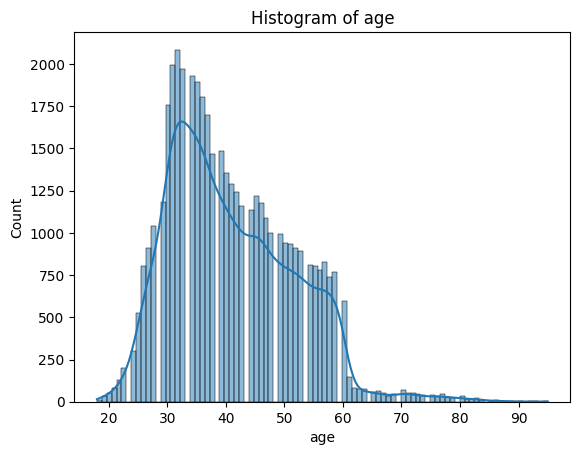

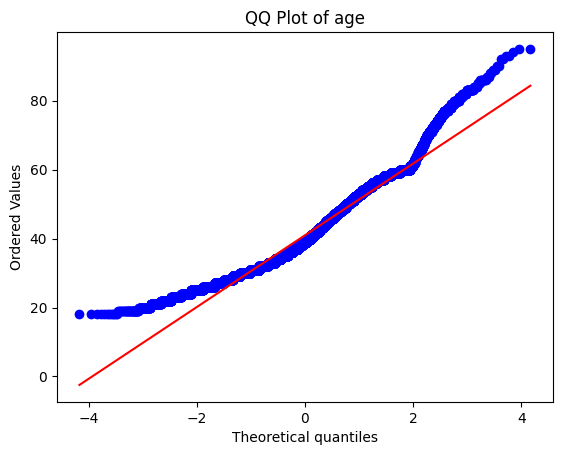

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test for age: p-value = 5.19801279038717e-73
age is not normally distributed (reject H0)


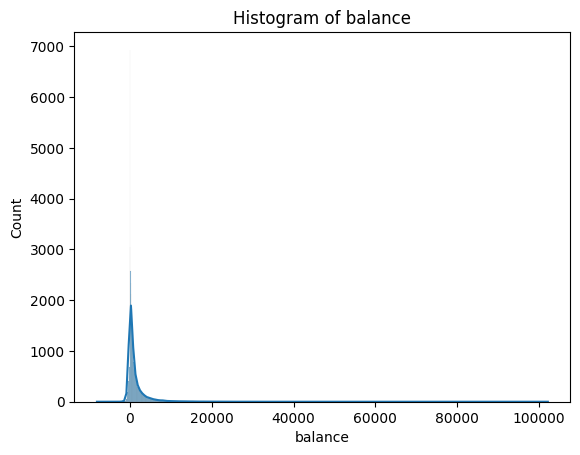

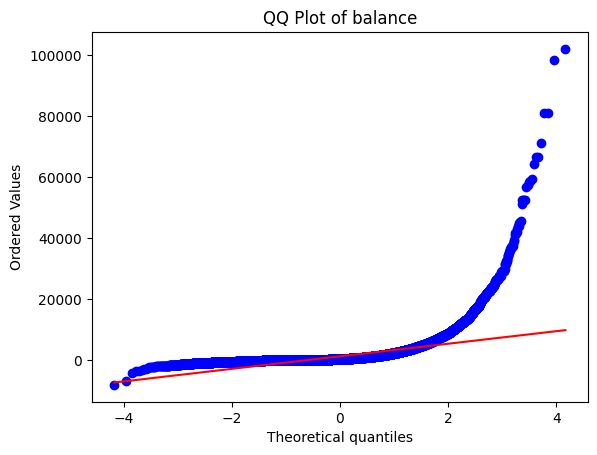

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test for balance: p-value = 1.7398177155251123e-141
balance is not normally distributed (reject H0)


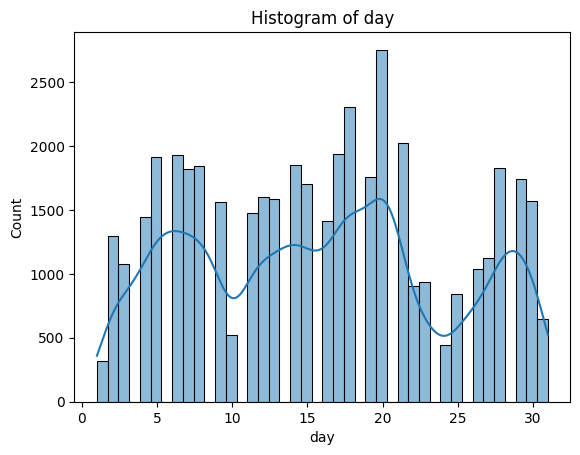

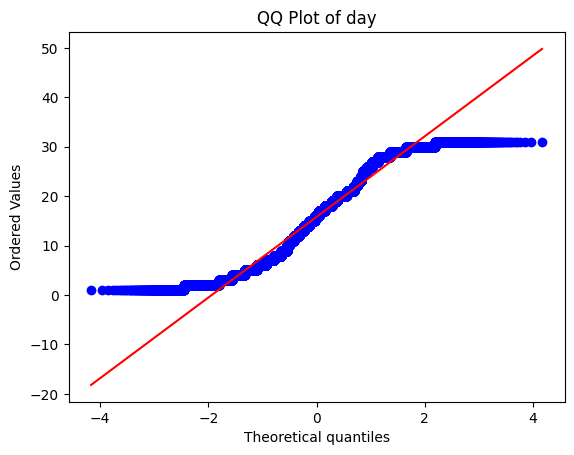

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test for day: p-value = 1.4365310818292007e-73
day is not normally distributed (reject H0)


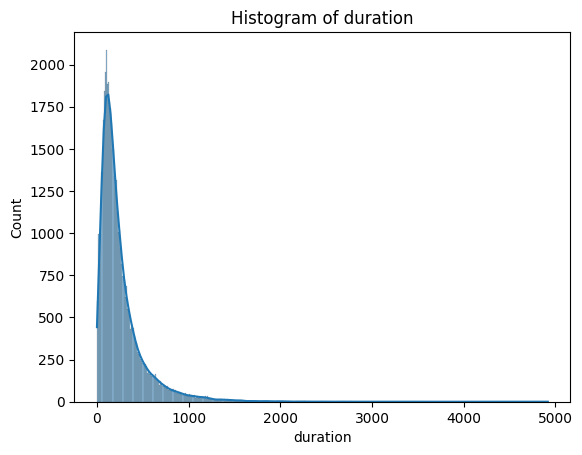

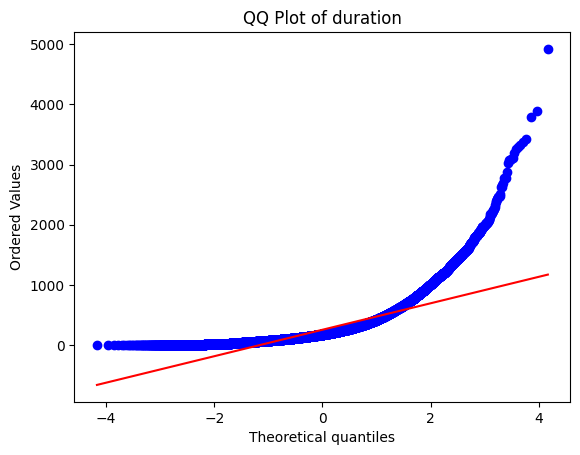

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test for duration: p-value = 2.4715087361699577e-121
duration is not normally distributed (reject H0)


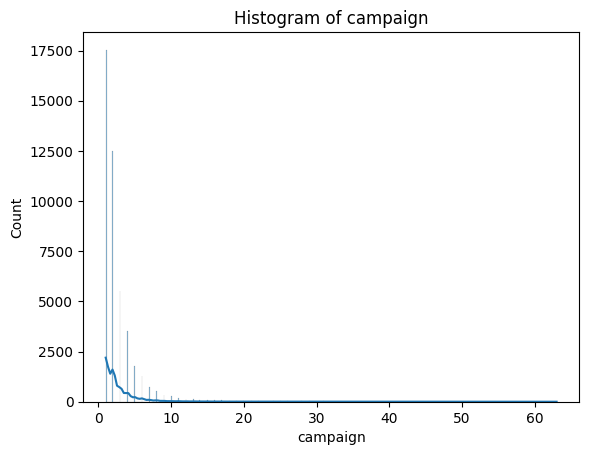

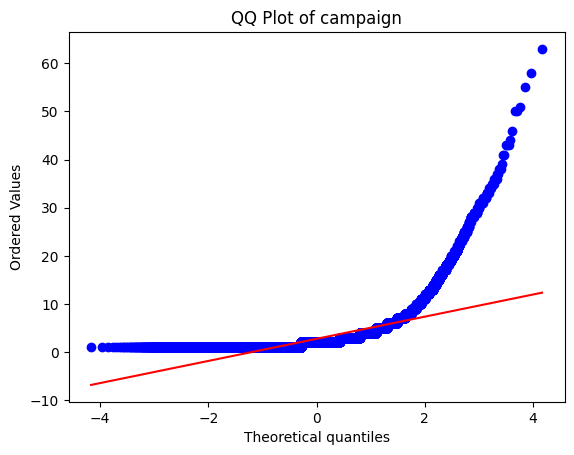

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test for campaign: p-value = 8.804094264522328e-136
campaign is not normally distributed (reject H0)


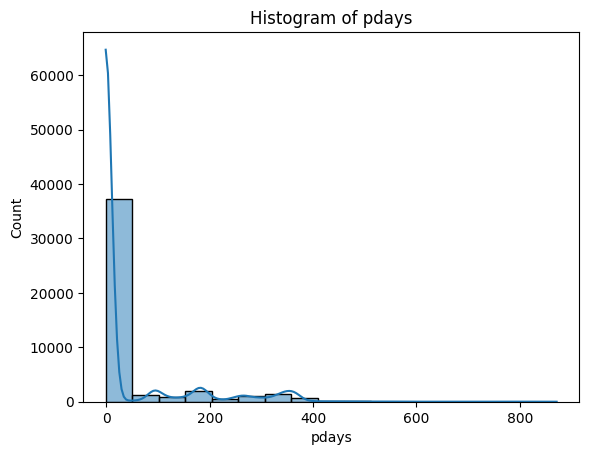

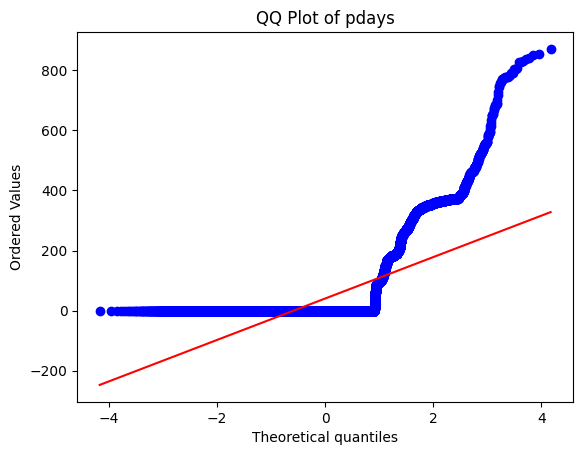

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test for pdays: p-value = 1.755633256016057e-140
pdays is not normally distributed (reject H0)


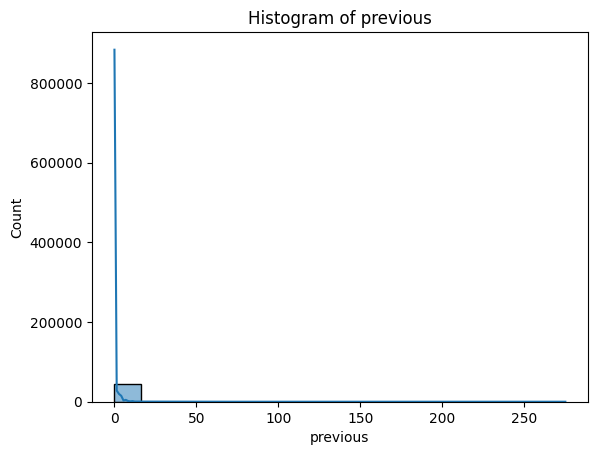

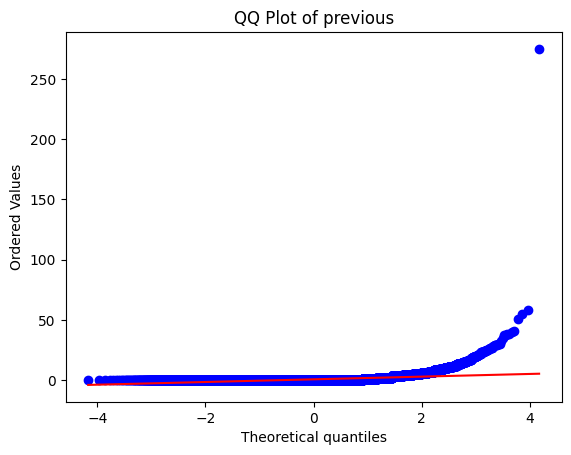

Shapiro-Wilk Test for previous: p-value = 4.151046789685079e-152
previous is not normally distributed (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot

# Lọc ra các cột có kiểu dữ liệu là số (liên tục)
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Hàm để kiểm tra tính chuẩn của phân phối
def check_normality(df, columns):
    for col in columns:
        # Vẽ biểu đồ histogram
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.show()

        # Vẽ biểu đồ QQ plot
        probplot(df[col].dropna(), dist="norm", plot=plt)
        plt.title(f'QQ Plot of {col}')
        plt.show()

        # Kiểm tra tính chuẩn bằng Shapiro-Wilk test
        stat, p_value = shapiro(df[col].dropna())  # Loại bỏ giá trị NaN
        print(f'Shapiro-Wilk Test for {col}: p-value = {p_value}')

        # Kết luận
        if p_value < 0.05:
            print(f'{col} is not normally distributed (reject H0)')
        else:
            print(f'{col} is normally distributed (fail to reject H0)')

# Gọi hàm với DataFrame và các cột biến liên tục
check_normality(df, continuous_columns)


In [ ]:
# Lọc ra các cột có kiểu dữ liệu là số (liên tục)
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Kiểm tra phân phối chuẩn bằng Shapiro-Wilk Test
for col in continuous_columns:
    stat, p_value = shapiro(df[col].dropna())  # Bỏ qua các giá trị NaN
    print(f'Column: {col}, Shapiro-Wilk Test p-value: {p_value}')
    if p_value > 0.05:
        print(f'-> {col} có phân phối chuẩn (p-value > 0.05)')
    else:
        print(f'-> {col} không có phân phối chuẩn (p-value <= 0.05)')

Column: age, Shapiro-Wilk Test p-value: 5.19801279038717e-73
-> age không có phân phối chuẩn (p-value <= 0.05)
Column: balance, Shapiro-Wilk Test p-value: 1.7398177155251123e-141
-> balance không có phân phối chuẩn (p-value <= 0.05)
Column: day, Shapiro-Wilk Test p-value: 1.4365310818292007e-73
-> day không có phân phối chuẩn (p-value <= 0.05)
Column: duration, Shapiro-Wilk Test p-value: 2.4715087361699577e-121
-> duration không có phân phối chuẩn (p-value <= 0.05)
Column: campaign, Shapiro-Wilk Test p-value: 8.804094264522328e-136
-> campaign không có phân phối chuẩn (p-value <= 0.05)
Column: pdays, Shapiro-Wilk Test p-value: 1.755633256016057e-140
-> pdays không có phân phối chuẩn (p-value <= 0.05)
Column: previous, Shapiro-Wilk Test p-value: 4.151046789685079e-152
-> previous không có phân phối chuẩn (p-value <= 0.05)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


Dùng log transformation đưa về phân phối chuẩn

Log transformation applied to column: age
Skipping column balance as it contains non-positive values.
Log transformation applied to column: day
Skipping column duration as it contains non-positive values.
Log transformation applied to column: campaign
Skipping column pdays as it contains non-positive values.
Skipping column previous as it contains non-positive values.
Column: age, Shapiro-Wilk Test p-value after log transformation: 3.1935864339509166e-47
-> age không có phân phối chuẩn sau khi log transformation (p-value <= 0.05)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


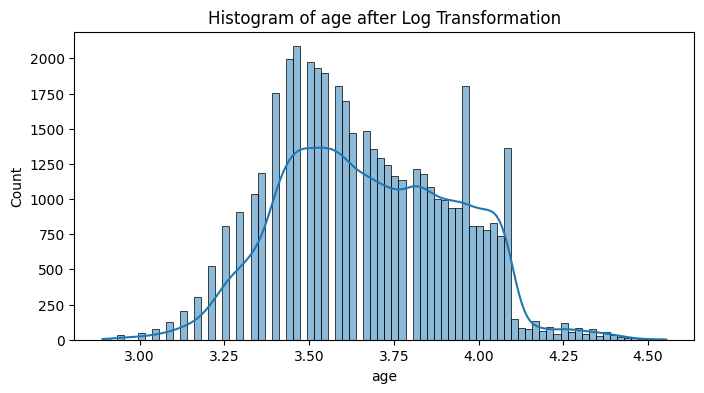

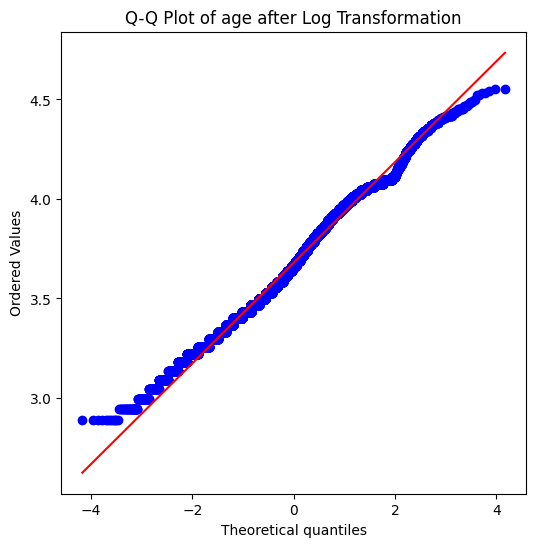

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


Column: day, Shapiro-Wilk Test p-value after log transformation: 4.567119764897902e-94
-> day không có phân phối chuẩn sau khi log transformation (p-value <= 0.05)


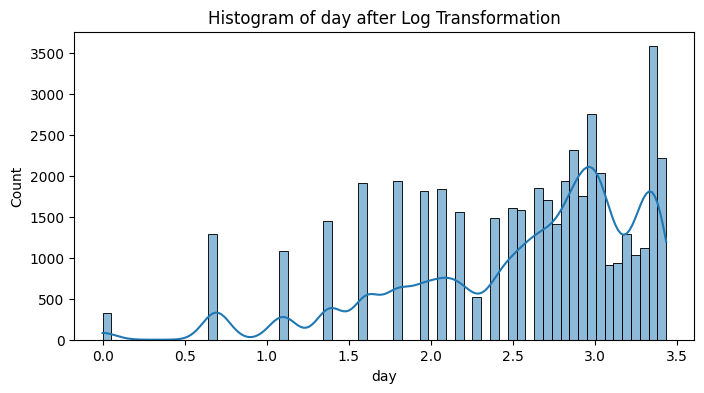

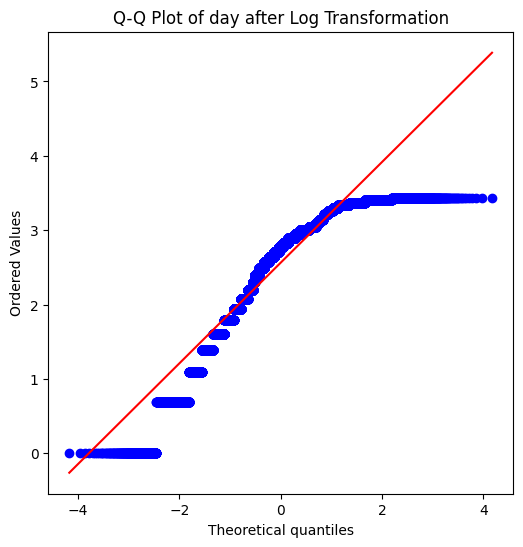

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


Column: campaign, Shapiro-Wilk Test p-value after log transformation: 1.4440958309993162e-103
-> campaign không có phân phối chuẩn sau khi log transformation (p-value <= 0.05)


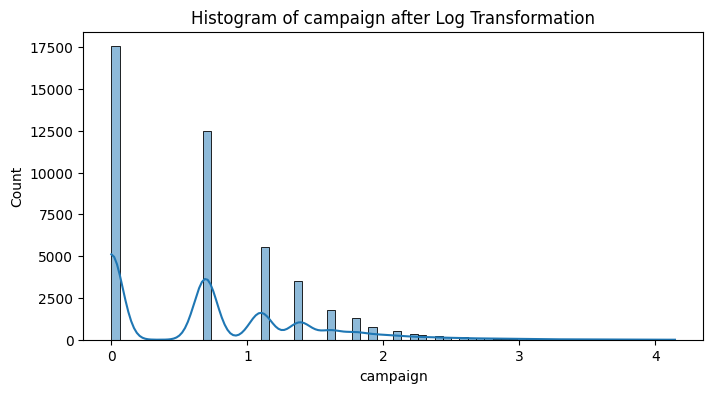

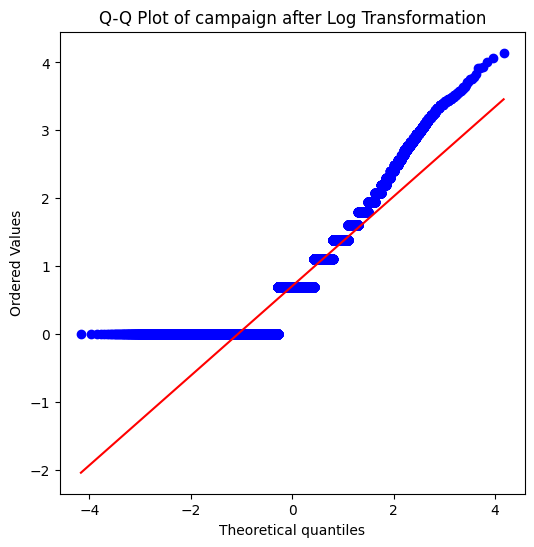

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt
import seaborn as sns



# Lọc ra các cột có kiểu dữ liệu là số (liên tục)
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Thực hiện log transformation cho các cột có giá trị dương
log_transformed_data = pd.DataFrame()
for col in continuous_columns:
    # Kiểm tra xem cột có giá trị dương không
    if (df[col] > 0).all():
        log_transformed_data[col] = np.log(df[col])
        print(f"Log transformation applied to column: {col}")
    else:
        print(f"Skipping column {col} as it contains non-positive values.")

# Kiểm tra lại phân phối chuẩn bằng Shapiro-Wilk Test sau khi log transformation
for col in log_transformed_data.columns:
    stat, p_value = shapiro(log_transformed_data[col].dropna())
    print(f'Column: {col}, Shapiro-Wilk Test p-value after log transformation: {p_value}')
    if p_value > 0.05:
        print(f'-> {col} có phân phối chuẩn sau khi log transformation (p-value > 0.05)')
    else:
        print(f'-> {col} không có phân phối chuẩn sau khi log transformation (p-value <= 0.05)')

    # Vẽ histogram sau log transformation
    plt.figure(figsize=(8, 4))
    sns.histplot(log_transformed_data[col].dropna(), kde=True)
    plt.title(f'Histogram of {col} after Log Transformation')
    plt.show()

    # Vẽ Q-Q plot sau log transformation
    plt.figure(figsize=(6, 6))
    probplot(log_transformed_data[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col} after Log Transformation')
    plt.show()


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np

# Tạo dữ liệu giả lập
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

# Tạo mô hình
model = LinearRegression()

# Thiết lập K-Fold với K = 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Đánh giá mô hình bằng Cross Validation
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')  # 'r2' là hệ số xác định cho hồi quy
print("Cross-validation scores for each fold:", scores)
print("Mean cross-validation score:", np.mean(scores))


Cross-validation scores for each fold: [0.99999566 0.99999567 0.99999658 0.99999442 0.99999815]
Mean cross-validation score: 0.9999960981498213


**ANN**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
# Khởi tạo mô hình ANN
# model = Sequential()

model = Sequential()
model.add(Dense(4, input_dim=23, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(X, y, epochs=50, verbose=1)



Epoch 1/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6071 - loss: 16.8604
Epoch 2/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9079 - loss: 0.3866
Epoch 3/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9060 - loss: 0.3265
Epoch 4/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9077 - loss: 0.3118
Epoch 5/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9101 - loss: 0.2779
Epoch 6/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9072 - loss: 0.2860
Epoch 7/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9060 - loss: 0.2831
Epoch 8/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9068 - loss: 0.2815
Epoch 9/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9072 - loss: 0.2917
Epoch 10/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9088 - loss: 0.2844
Epoch 11/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9101 - loss: 0.2735
Epoch 12/50
1093/1093 ━━━━━━━

Epoch 1/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9093 - loss: 0.2709
Epoch 2/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9084 - loss: 0.2693
Epoch 3/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9072 - loss: 0.2736
Epoch 4/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9108 - loss: 0.2657
Epoch 5/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9082 - loss: 0.2689
Epoch 6/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9127 - loss: 0.2620
Epoch 7/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9083 - loss: 0.2659
Epoch 8/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9083 - loss: 0.2658
Epoch 9/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9102 - loss: 0.2550
Epoch 10/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9080 - loss: 0.2701
Epoch 11/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9053 - loss: 0.2725
Epoch 12/50
1093/1093 ━━━━━━━━

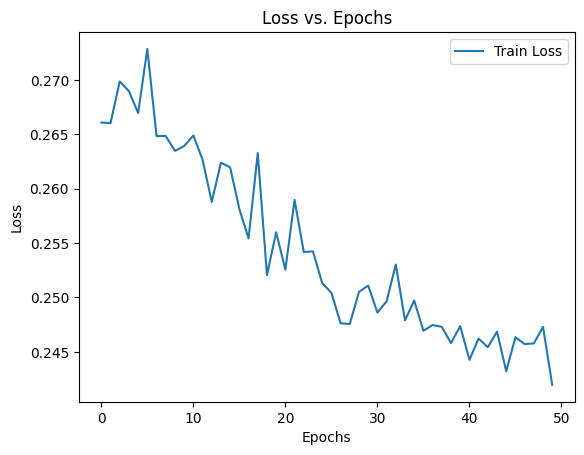

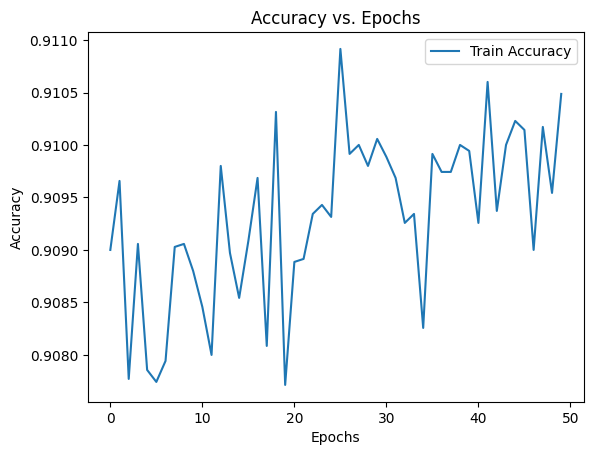

In [ ]:
import matplotlib.pyplot as plt

# Giả sử bạn đã lưu lịch sử huấn luyện vào một biến history
history = model.fit(X, y, epochs=50, verbose=1)

# Biểu đồ Loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Biểu đồ Accuracy (chỉ dùng nếu đang phân loại và sử dụng 'accuracy' trong metrics)
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training data into numpy
inputs_scaled = np.array(X_train_scaled)
outputs = np.array(y_train).reshape(-1, 1)

#vConvert testing data into numpy
inputs_scaled_test = np.array(X_test_scaled)
outputs_test = np.array(y_test).reshape(-1, 1)

In [ ]:
# Hyperparameters for training
epochs = 100
learning_rate = 0.00001
# batch_size = 3

In [ ]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_hidden_input = np.random.rand(input_size, hidden_size)
        self.weights_hidden_out = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def relu_derivative(x):
        return np.where(x > 0, 1, 0)

    def forward(self, X):
        # Forward pass using ReLU activation
        self.hidden_layer_values = np.dot(X, self.weights_hidden_input) + self.bias_hidden
        self.hidden_layer_output = self.relu(self.hidden_layer_values)
        self.output_layer_values = np.dot(self.hidden_layer_output, self.weights_hidden_out) + self.bias_output
        return self.output_layer_values

    def backward(self, X, y, predicted):
        # Backward pass (MSE loss derivative)
        dS_out = predicted - y
        dW_out = np.dot(self.hidden_layer_output.T, dS_out)
        db_out = np.sum(dS_out, axis=0, keepdims=True)
        dS_hidden = np.dot(dS_out, self.weights_hidden_out.T) * self.relu_derivative(self.hidden_layer_output)
        dW_hidden = np.dot(X.T, dS_hidden)
        db_hidden = np.sum(dS_hidden, axis=0, keepdims=True)
        return dW_hidden, dW_out, db_hidden, db_out

    def update(self, dW_hidden, dW_out, db_hidden, db_out):
        # Update weights and biases using gradients
        self.weights_hidden_input -= learning_rate * dW_hidden
        self.weights_hidden_out -= learning_rate * dW_out
        self.bias_hidden -= learning_rate * db_hidden
        self.bias_output -= learning_rate * db_out

    def predict(self, X):
        # Prediction function
        return self.forward(X)


In [ ]:
model = SimpleNeuralNetwork(inputs_scaled.shape[1], 10, outputs.shape[1])

In [ ]:
import numpy as np


# Khởi tạo learning rate nhỏ hơn
learning_rate = 0.001  # Hãy thử giảm learning rate nếu vấn đề vẫn xảy ra

# Training loop
cost_history = []
for epoch in range(epochs):
    # Forward pass
    predicted = model.forward(inputs_scaled)

    # Kiểm tra NaN trong đầu ra của forward pass
    if np.isnan(predicted).any():
        print(f"NaN detected in forward pass at epoch {epoch}")
        break

    # Calculate loss (Mean Squared Error)
    cost = np.mean((predicted - outputs) ** 2)

    # Kiểm tra NaN trong cost
    if np.isnan(cost):
        print(f"NaN detected in cost function at epoch {epoch}")
        break

    cost_history.append(cost)

    # Backward pass and update weights
    dW1, dW2, db1, db2 = model.backward(inputs_scaled, outputs, predicted)

    # Kiểm tra NaN trong gradients
    if np.isnan(dW1).any() or np.isnan(dW2).any() or np.isnan(db1).any() or np.isnan(db2).any():
        print(f"NaN detected in gradients at epoch {epoch}")
        break

    # Update weights with learning rate
    model.update(learning_rate * dW1, learning_rate * dW2, learning_rate * db1, learning_rate * db2)

    # Print loss for each epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Cost: {cost}")


Epoch 0, Cost: 87.4322085017645
Epoch 10, Cost: 0.42771874245017405
Epoch 20, Cost: 0.2864824331094862
Epoch 30, Cost: 0.21836551387290445
Epoch 40, Cost: 0.17877362881343808
Epoch 50, Cost: 0.15300840770439061
Epoch 60, Cost: 0.13512026965697904
Epoch 70, Cost: 0.1222117854820154
Epoch 80, Cost: 0.1126537668069929
Epoch 90, Cost: 0.10543886234227492


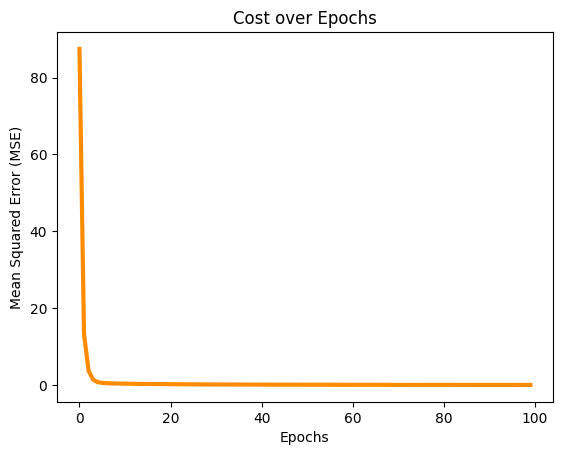

In [ ]:
# Plotting cost history
plt.plot(cost_history, lw=3, color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cost over Epochs')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluation on the training set
predicted_output = model.predict(inputs_scaled)

# Calculate evaluation metrics on training set
mse_train = mean_squared_error(outputs, predicted_output)
mae_train = mean_absolute_error(outputs, predicted_output)

# Print evaluation results
print(f'Training MSE: {mse_train}')
print(f'Training MAE: {mae_train}')

Training MSE: 0.09990589847234393
Training MAE: 0.17778147021755777


In [ ]:

# Evaluate on test set
predicted_test_output = model.predict(inputs_scaled_test)

# Calculate evaluation metrics on test set
mse_test = mean_squared_error(outputs_test, predicted_test_output)
mae_test = mean_absolute_error(outputs_test, predicted_test_output)

# Print test set evaluation
print(f'Test MSE: {mse_test}')
print(f'Test MAE: {mae_test}')

Test MSE: 0.09769262118811134
Test MAE: 0.17497066762109095


Epoch 1/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8515 - loss: 1.6285 - val_accuracy: 0.8910 - val_loss: 0.8235
Epoch 2/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8691 - loss: 0.7172 - val_accuracy: 0.8621 - val_loss: 0.4144
Epoch 3/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8827 - loss: 0.5525 - val_accuracy: 0.9109 - val_loss: 0.3329
Epoch 4/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8856 - loss: 0.4710 - val_accuracy: 0.9104 - val_loss: 0.6703
Epoch 5/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8749 - loss: 0.6655 - val_accuracy: 0.9104 - val_loss: 0.7527
Epoch 6/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8889 - loss: 0.5259 - val_accuracy: 0.9106 - val_loss: 0.4388
Epoch 7/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8946 - loss: 0.4494 - val_accuracy: 0.9081 - val_loss: 0.2763
Epoch 8/50
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8957 - loss: 0.3747 - val_accuracy: 0.

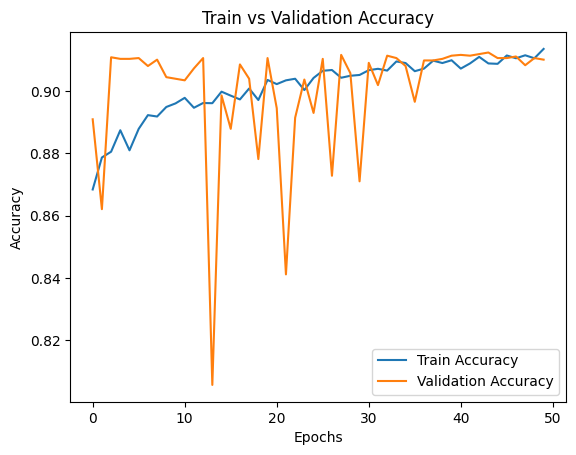

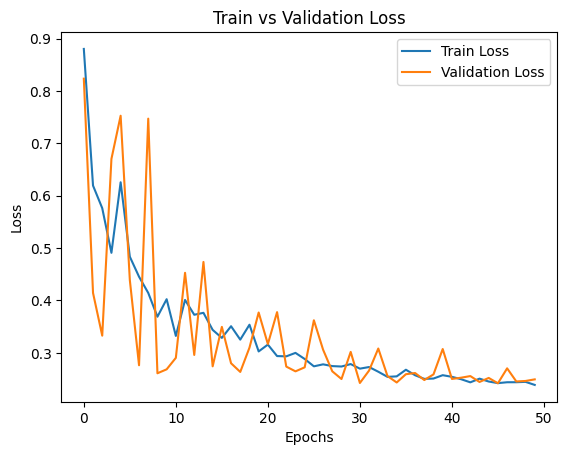

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Get the actual number of features from your training data
input_dim = X_train.shape[1]

# Assuming you have your training data in X_train and y_train
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)  # Adjust test_size and random_state as needed

# Khởi tạo mô hình đơn giản (cấu trúc có thể thay đổi tùy thuộc vào bài toán cụ thể của bạn)
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),  # input_dim is now dynamically set
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # hoặc 'softmax' cho bài toán phân loại nhiều lớp
])

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # hoặc 'categorical_crossentropy' cho bài toán phân loại nhiều lớp
              metrics=['accuracy'])

# Huấn luyện mô hình với dữ liệu validation
history = model.fit(
    X_train,
    y_train,
    epochs=50,  ư
    batch_size=32,
    validation_data=(X_val, y_val),  # Dữ liệu validation
    # Hoặc có thể dùng validation_split=0.2
    verbose=1
)

# Vẽ biểu đồ accuracy và loss của quá trình huấn luyện và validation
import matplotlib.pyplot as plt

# Biểu đồ accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()

# Biểu đồ loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()